### __BUSA3020 Group Assignment - Predicting Used Car Sale Prices__

#### Team Name: BUSA3020_Scatterplot

--- 

**Kaggle Competition Ends:** Friday, 31 May 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 31 May 2024 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc](https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA3020_algorithm_arena
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 positions on the **final** leaderboard for your unit 
- 3 marks: Reaching the 1st place in your unit according to the **final** leaderboard ranking


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)
    - You don't need to score yourself

---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA3020_Scatterplot`
- Team Leader and Team Member 1: `Zhi Wei Alphonsus Chua 46253009`
- Team Member 2: `Hoai Anh Nguyen 47493933`
- Team Member 3: `Ngoc Tram Anh Ho 46856617`

---

## Task 1: Problem Description and Initial Data Analysis

1. Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
- Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (3 marks)    
- Evaluation Criteria - discuss the criteria that  is used to assess forecasting performance in detail (3 marks)     
- Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
- Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
- Provide and discuss some interesting *univariate* summary statistics and distributions in the training dataset  (2 marks)       
- Other Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
    - Minimise the number of cells you use to enhance presentation and readability

**Total Marks: 12**   

Student in charge of this task: Hoai Anh Nguyen

### Problem Description

#### Forecasting Problem

Our forecasting problem involves predicting sale prices of used cars based on various features such as length, width, make name, model name, maximum number of seatings. Our data was splitted into training and testing datasets. The training dataset contains 7,000 entries with 39 variables, while the test set includes 3,000 observations of 38 variables. The target variable is the price. Forecating models will be built on the training data and the performance of these models will be evaluated using testing data to assess their ability to accurately predict the prices of pre-owned cars. 

In the real world, the prediction of used car prices provides valuable insights for various stakeholders. Car dealerships can ultilize the predicted prices to adjust inventory levels and develop pricing strategies to minimise losses and maximise profits. Individual sellers can also use the prediction to set a competitive price and attract more buyers while buyers can use the price forecasts as a comparison tool for price negotiation, enabling them to make informed decisions on whether a car is worth the price listed.


#### Evaluation Criteria

MAPE is used as a main criteria to assess forecasting performance,indicates the deviation between actual values and predicted values as a average percentage and told us how far off our predictions are, on average. It is calculated by taking the absolute error for each observation (the absolute different between actual price and predicted price for each car), then divided it by actual value (actual price of the car) and multiplying by 100. Finally, the average of these percentages will be taken to find the overall MAPE. The smaller the MAPE, the better the model.

#### Initial Data Analysis

In [49]:
import pandas as pd
import numpy as np
import re

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   7000 non-null   object 
 1   back_legroom          6997 non-null   object 
 2   body_type             7000 non-null   object 
 3   city                  7000 non-null   object 
 4   city_fuel_economy     7000 non-null   float64
 5   daysonmarket          7000 non-null   int64  
 6   dealer_zip            7000 non-null   int64  
 7   engine_displacement   7000 non-null   float64
 8   engine_type           7000 non-null   object 
 9   exterior_color        6890 non-null   object 
 10  franchise_dealer      6916 non-null   object 
 11  front_legroom         6997 non-null   object 
 12  fuel_tank_volume      6997 non-null   object 
 13  fuel_type             7000 non-null   object 
 14  height                6997 non-null   object 
 15  highway_fuel_economy 

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   3000 non-null   object 
 1   back_legroom          2975 non-null   object 
 2   body_type             3000 non-null   object 
 3   city                  3000 non-null   object 
 4   city_fuel_economy     2651 non-null   float64
 5   daysonmarket          3000 non-null   int64  
 6   dealer_zip            3000 non-null   int64  
 7   engine_displacement   2973 non-null   float64
 8   engine_type           2941 non-null   object 
 9   exterior_color        2955 non-null   object 
 10  franchise_dealer      2961 non-null   object 
 11  front_legroom         2975 non-null   object 
 12  fuel_tank_volume      2975 non-null   object 
 13  fuel_type             2955 non-null   object 
 14  height                2975 non-null   object 
 15  highway_fuel_economy 

#### Categorising Variables

Our dataset includes 39 variables representing basic features of a car. There are 20 numeric variables, 8 ordinal variables with clear orderings between each category and 11 nominal variables.

| Variable Kind | Number of Features | Feature Names |
|---------------|--------------------|---------------|
| Numeric       | 20                 | back_legroom, city_fuel_economy, daysonmarket, engine_displacement, front_legroom, fuel_tank_volume, height, highway_fuel_economy, horsepower, latitude, length, longitude, mileage, power, savings_amount, seller_rating, torque, wheelbase, width, price|
| Ordinal       | 8                  | body_type, city, dealer_zip, engine_type,  fuel_type,  listed_date, transmission, year|
| Nominal       | 11                 | vin, franchise_dealer, is_new, listing_color, make_name, maximum_seating, model_name, wheel_system, transmission_display, exterior_color, interior_color,|


Target Variable: price

#### Missing Values

Missing values were found in both training and testing dataset. 18 variables from training dataset have 
missing values and interior_color appears to have the largest number of values missing (805).

Testing dataset contains 26 variables with missing values. Interior_color also has the largest number of missing values in the testing dataset (379).

In [52]:
#if a column has missing values, print the column name and number of missing values
def print_missing_values(df, dataset_name):
    print(f"Missing Values for '{dataset_name}' dataset")
    missing_values = df.isnull().sum() #check for missing values
    for column, missing_count in missing_values.items():
        if missing_count > 0:
            print(f"Variable '{column}' has {missing_count} missing values.") 
    print()

#print missing values for train and test sets
print_missing_values(df_train, 'train')
print_missing_values(df_test, 'test')

Missing Values for 'train' dataset
Variable 'back_legroom' has 3 missing values.
Variable 'exterior_color' has 110 missing values.
Variable 'franchise_dealer' has 84 missing values.
Variable 'front_legroom' has 3 missing values.
Variable 'fuel_tank_volume' has 3 missing values.
Variable 'height' has 3 missing values.
Variable 'interior_color' has 805 missing values.
Variable 'latitude' has 134 missing values.
Variable 'length' has 3 missing values.
Variable 'maximum_seating' has 3 missing values.
Variable 'mileage' has 282 missing values.
Variable 'power' has 8 missing values.
Variable 'savings_amount' has 108 missing values.
Variable 'seller_rating' has 100 missing values.
Variable 'transmission' has 75 missing values.
Variable 'transmission_display' has 75 missing values.
Variable 'wheel_system' has 2 missing values.
Variable 'wheelbase' has 3 missing values.
Variable 'width' has 3 missing values.

Missing Values for 'test' dataset
Variable 'back_legroom' has 25 missing values.
Varia

#### Univariate Analysis

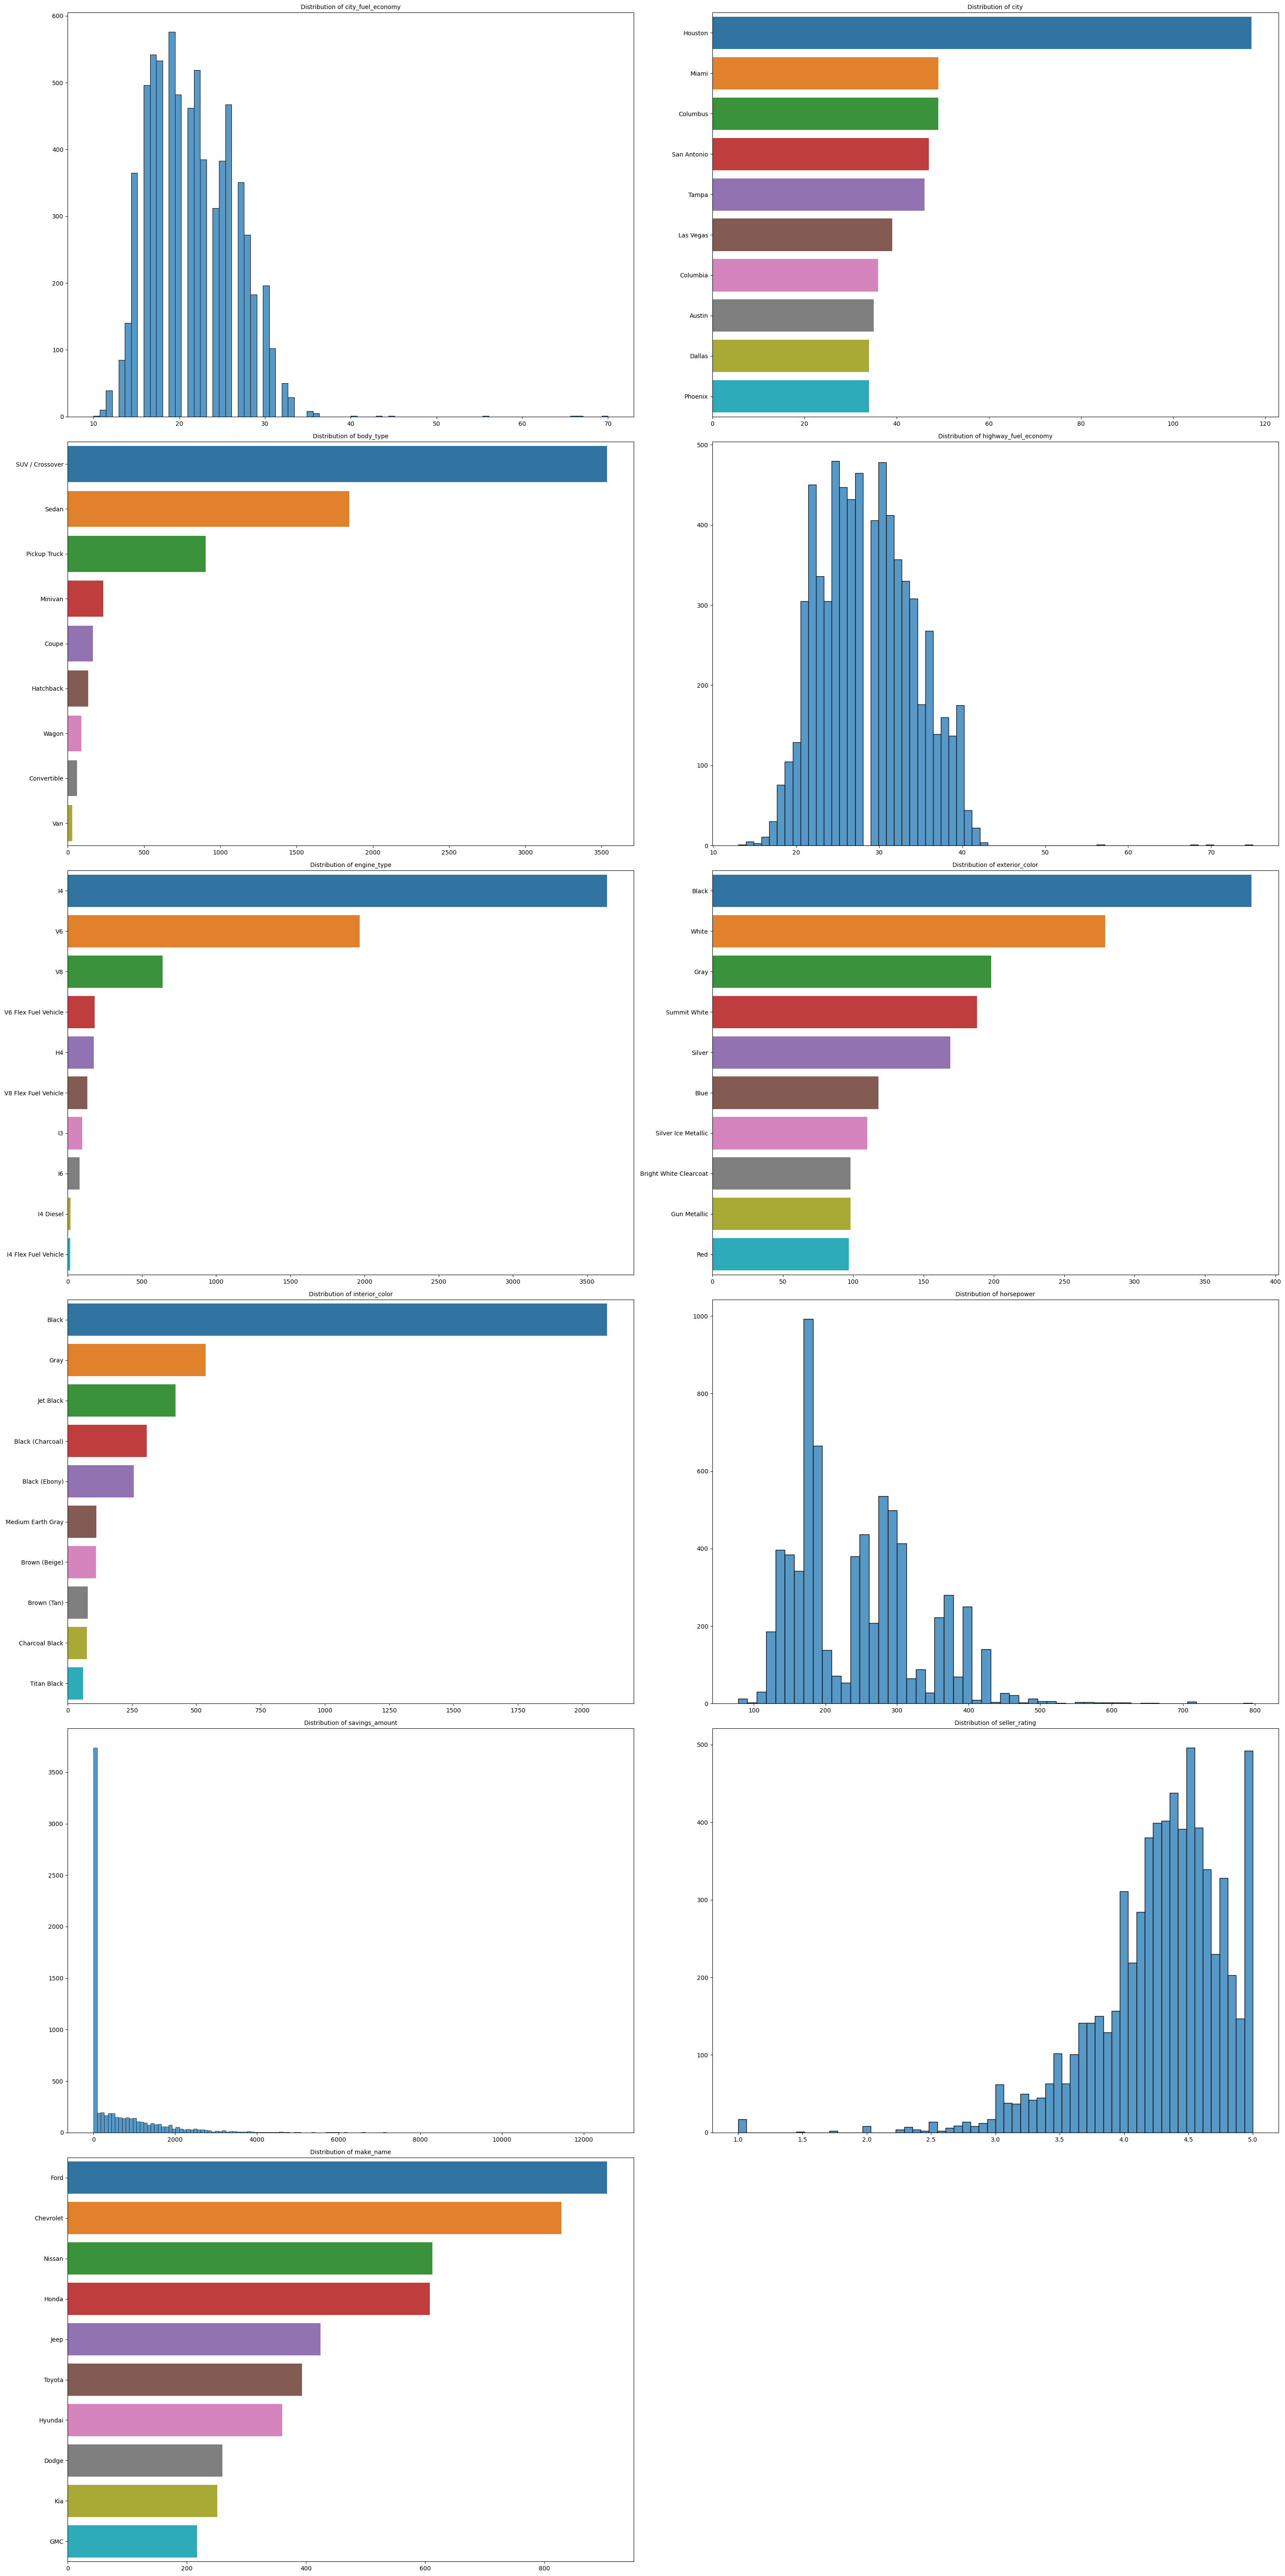

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conducting univariate analysis for few selected features 
selected_vars = ['city_fuel_economy', 'city', 'body_type', 'highway_fuel_economy', 'engine_type', 'exterior_color', 'interior_color', 'horsepower', 'savings_amount', 
                 'seller_rating', 'make_name', 'model_name']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 60))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, var in enumerate(selected_vars):
    ax = axes.flatten()[i]
    if df_train[var].dtype == 'object':
        # If the number of unique categories is high, show only the top 10 categories
        sns.countplot(y=var, data=df_train, ax=ax, order=df_train[var].value_counts().iloc[:10].index)
        ax.set_title(f'Distribution of {var}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.histplot(df_train[var], kde=False, ax=ax)
        ax.set_title(f'Distribution of {var}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Hide unused axes
axes.flatten()[11].set_visible(False)

plt.tight_layout()
plt.show()

The most common city in the dataset is Houston. As depicted in the bar chart, the number of cars listed in Houston is almost double that of the second-ranked city, Miami. Black is the dominant color for both the interior and exterior. Ford emerges as the most frequent make name in the dataset and SUV/ Crossover is the most popular body type.  

Outliers were detected from numerical variables. The distribution of "seller_rating" is left-skewed, indicating that the majority of the sellers in the dataset receives high ratings for their services (above 4.0).
In contrast, the distribution of savings_amount displays a pronounced right-skewed, suggesting that the amount savings from buying used cars are not significant.

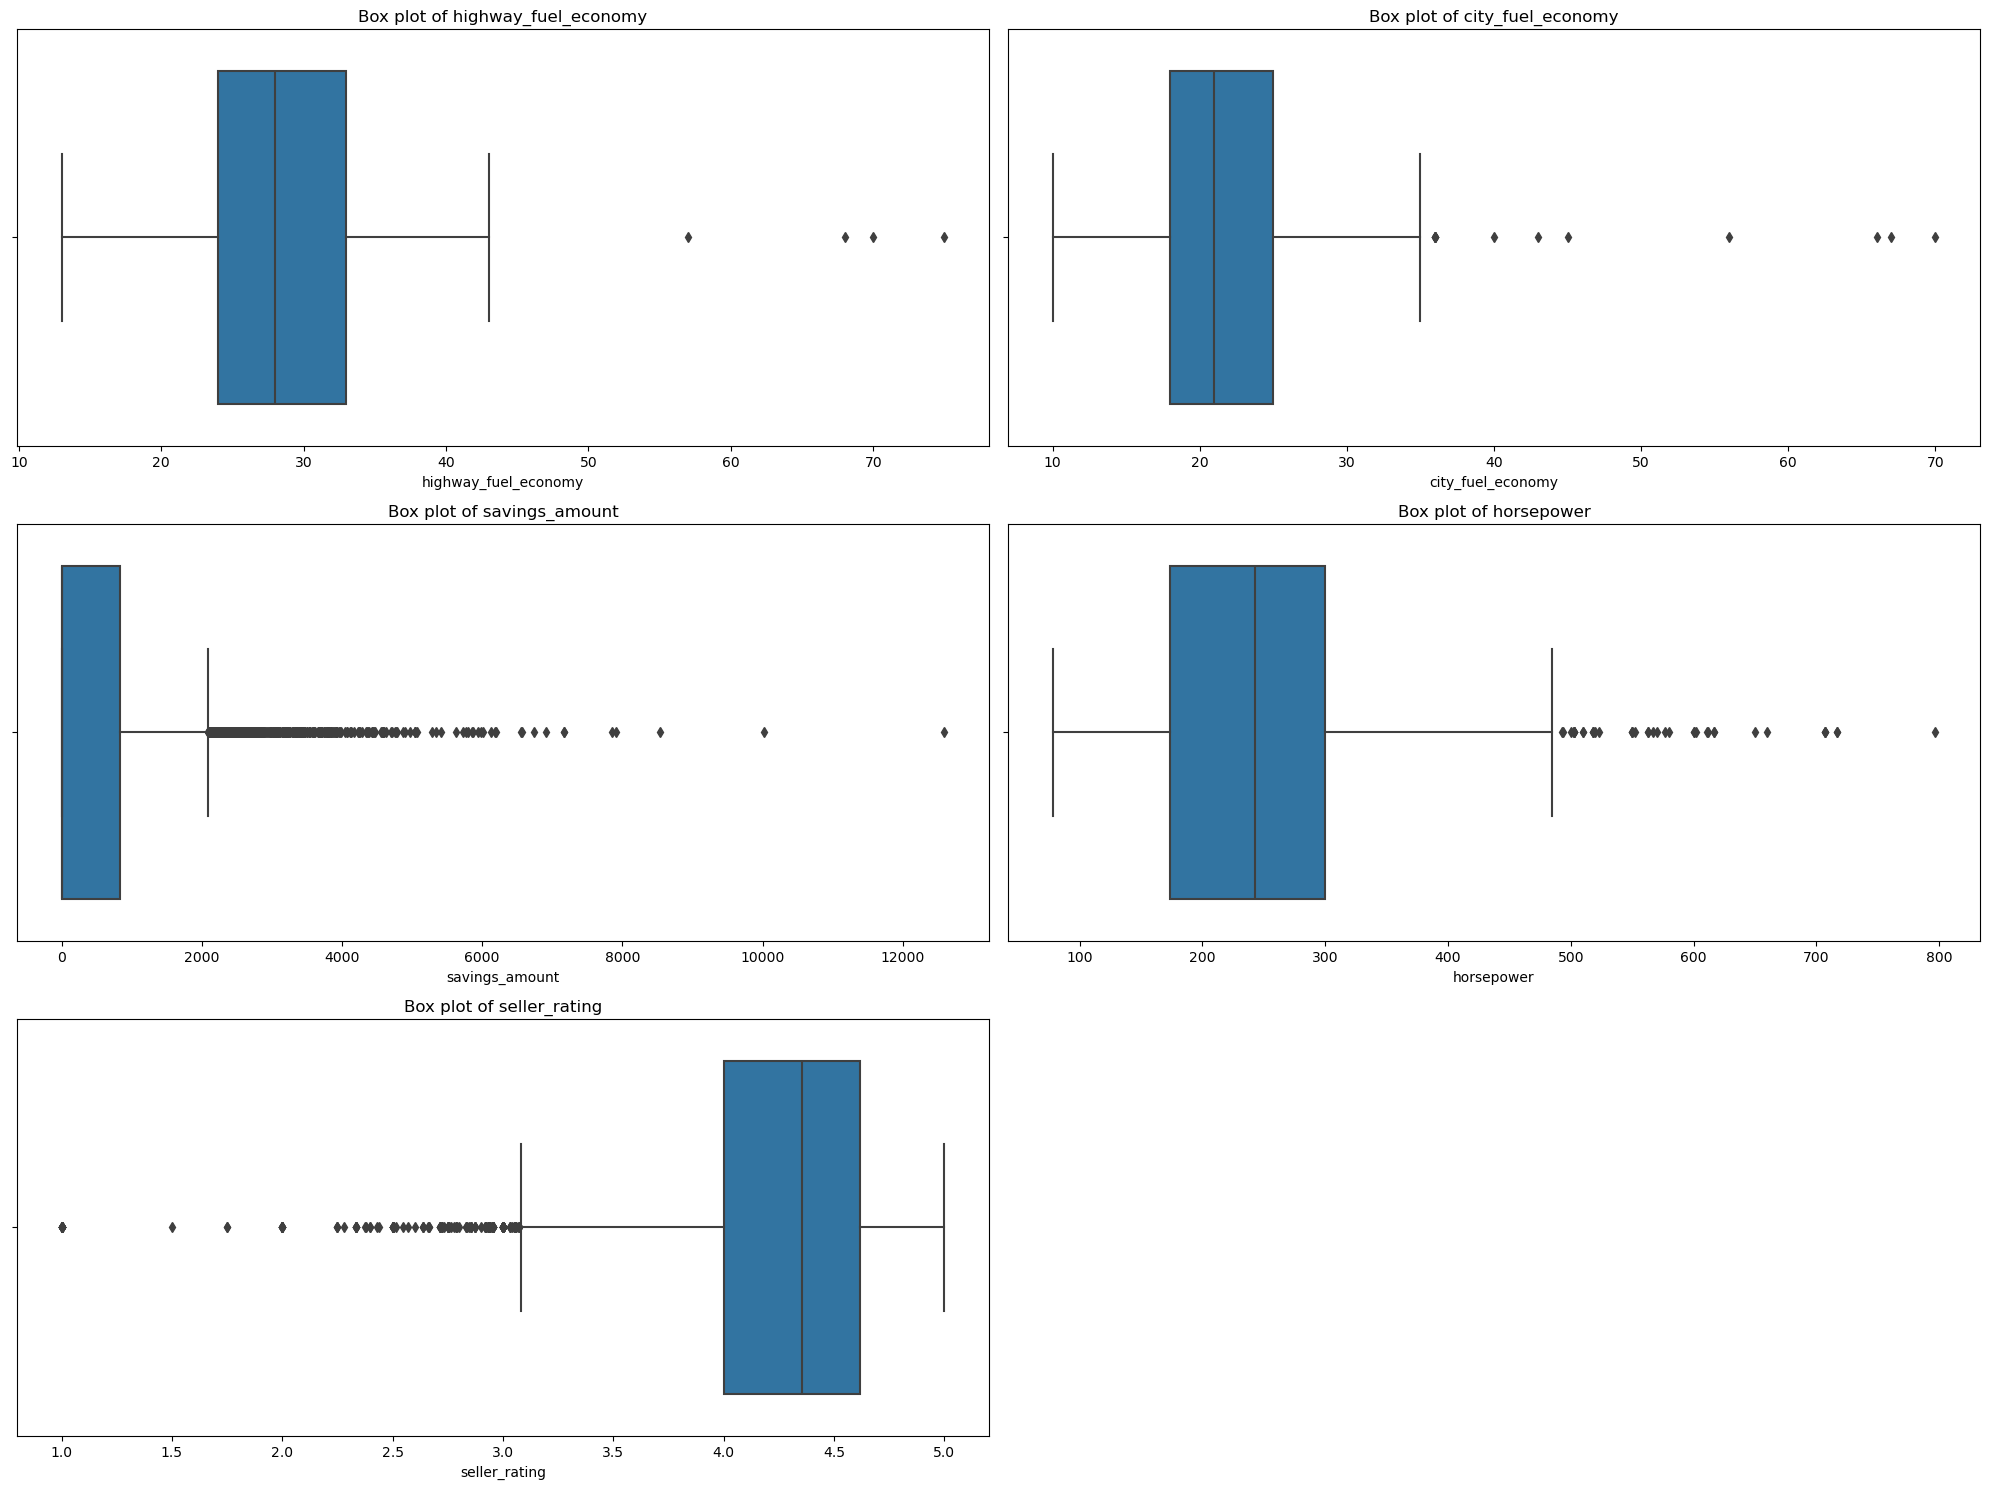

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_num = ['highway_fuel_economy', 'city_fuel_economy', 'savings_amount', 'horsepower', 'seller_rating'] 
# Visualize outliers with box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(selected_num, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

Looking at the box plots above, we can see that outliers were detected in all the selected numerical variables. Those outliers require further investigation to appropriately handle them before conducting predictive models.

In [55]:
numerical_vars = df_train[['city_fuel_economy', 'highway_fuel_economy', 'daysonmarket', 'horsepower', 'savings_amount', 'seller_rating']]
summary_stats = numerical_vars.describe().transpose()

# Create summary table
numerical_summary_table = pd.DataFrame({
    'Mean': summary_stats['mean'],
    'Median': summary_stats['50%'], 
    'Std Dev': summary_stats['std'],
    'Min': summary_stats['min'],
    'Max': summary_stats['max']
})
# Display summary table
print(numerical_summary_table)


                            Mean      Median     Std Dev   Min      Max
city_fuel_economy      21.497429   21.000000    4.857918  10.0     70.0
highway_fuel_economy   28.661714   28.000000    5.658987  13.0     75.0
daysonmarket           75.878571   36.000000  105.594450   0.0   1259.0
horsepower            245.218429  243.000000   87.436127  78.0    797.0
savings_amount        551.306152    0.000000  929.364379   0.0  12596.0
seller_rating           4.274146    4.355556    0.517830   1.0      5.0


The values for 'highway_fuel_economy' range from 13 to 75 km per litre and 'horsepower' ranges from 78 to 797 watts. We can see that the standard deviation for 'daysonmarket', 'savings_amount' are quite large compared to the mean, indicating high variation.

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you need to follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text, as well as on your video.

**Total Marks: 12**

Student in charge of this task: `Ngoc Tram Anh Ho`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

#### Clean Datasets

In [56]:
#Creating a function to clean specific numerical variables
def clean_data(df):
    # Clean numerical columns with ' in' suffix
    clean_num = ['back_legroom', 'front_legroom', 'height', 'length', 'wheelbase', 'width']
    for col in clean_num:
        df[col] = df[col].str.replace(' in', '')  # Remove the ' in' suffix
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float
        mean_val = df[col].mean()  # Calculate the mean of the column
        df[col] = df[col].fillna(mean_val)  # Fill NaN values with the mean
    
    # Clean fuel_tank_volume column
    df['fuel_tank_volume'] = df['fuel_tank_volume'].str.replace(' gal', '')  # Remove 'gal' suffix
    df['fuel_tank_volume'] = df['fuel_tank_volume'].astype(float)  # Convert to float
    mean_ftv = df['fuel_tank_volume'].mean()  # Calculate mean of fuel_tank_volume
    df['fuel_tank_volume'] = df['fuel_tank_volume'].fillna(mean_ftv)  # Fill NaN values with the mean
    
    # Clean maximum_seating column
    df['maximum_seating'] = df['maximum_seating'].str.replace(' seats', '')  # Remove 'seats' suffix
    df['maximum_seating'] = df['maximum_seating'].astype(float)  # Convert to float
    median_ms = df['maximum_seating'].median()  # Calculate median of maximum_seating
    df['maximum_seating'] = df['maximum_seating'].fillna(median_ms)  # Fill NaN values with the median
    df['maximum_seating'] = df['maximum_seating'].astype(int)  # Convert to int
    
    return df

#Clean Train and Test
df_train = clean_data(df_train)
df_test = clean_data(df_test)

We identify the numerical variables from our initial data exploration and scanning from csv and put them in a list.
We then call that list in the function to clean the data by removing the text and converting to integer.

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

We derived 5 features: 'maximum_power', 'power_rpm', 'maximum_torque', 'torque_rpm', 'age' from the existing variables
'listed_year', 'year', 'power' and 'torque'.

#### Feature Creation

Looking at the dataset, we can see that there are various features which contain multiple iems of information. For example, power involves maximum power and revolutions per minute (RPM). 'listed_date' contains year, month and day. It's necessary to extract relevant information from these features into the format that model can understand to optimize model performance and to gain valuable insights about how individual components of the feature contribute to the model's predictions.

In [57]:
def create_feature(df):
    # Handle power column
    df['power'] = df['power'].str.replace(',', '')
    split_power = df['power'].str.split(' ', expand=True)
    df['maximum_power'] = split_power[0].astype(float)
    df['power_rpm'] = split_power[3].astype(float)
    
    # Impute NaN values for power
    mean_maxpower = df['maximum_power'].mean()
    mean_powrpm = df['power_rpm'].mean()
    df['maximum_power'] = df['maximum_power'].fillna(mean_maxpower)
    df['power_rpm'] = df['power_rpm'].fillna(mean_powrpm)
    
    # Handle torque column
    df['torque'] = df['torque'].str.replace(',', '')
    split_torque = df['torque'].str.split(' ', expand=True)
    df['maximum_torque'] = split_torque[0].astype(float)
    df['torque_rpm'] = split_torque[3].astype(float)
    
    # Impute NaN values for torque
    mean_maxtorque = df['maximum_torque'].mean()
    mean_torquerpm = df['torque_rpm'].mean()
    df['maximum_torque'] = df['maximum_torque'].fillna(mean_maxtorque)
    df['torque_rpm'] = df['torque_rpm'].fillna(mean_torquerpm)
    
    # Handle listed_date column
    df['listed_date'] = df['listed_date'].str.replace('/', ' ')
    split_date = df['listed_date'].str.split('-', expand=True)
    df['listed_month'] = split_date[1].astype(int)
    df['listed_year'] = split_date[0].astype(int)
    
    # Create age feature
    df['age'] = df['listed_year'] - df['year']
    
    # Drop original torque and power columns
    df.drop(['torque', 'power'], axis=1, inplace=True)
    
    return df

# Apply the function to both training and test datasets
df_train = create_feature(df_train)
df_test = create_feature(df_test)

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(3 marks)

#### Imputing Latitude using Geopy

In [58]:
#This dataset already has latitude imputed from geopy
df_train = pd.read_csv("data/train2.csv")
df_test = pd.read_csv("data/test2.csv")


In [59]:
#Save imputed latitudes so we don't have to process geopy again.
#df_train.to_csv('train2.csv', index=False)
#df_test.to_csv('test2.csv', index=False)

#### Imputing Missing Values for Remaining Variables

Seperate the data into two lists of categorical and numerical

In [60]:
def impute_missing_values(df, num_cols, cat_cols):
    """
    Imputes missing values in the given DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame to impute.
    num_cols (list): List of numerical column names.
    cat_cols (list): List of categorical column names.

    Returns:
    pd.DataFrame: DataFrame with imputed values.
    """
    # Numeric imputation using mean
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    
    # Categorical imputation using mode
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
    
    return df

# Define the columns for training and testing data
train_cat = ['exterior_color', 'interior_color', 'franchise_dealer', 'transmission', 
             'transmission_display', 'wheel_system']
train_num = ['mileage', 'savings_amount', 'seller_rating']

test_cat = ['engine_type', 'exterior_color', 'franchise_dealer', 'fuel_type', 
            'interior_color', 'transmission', 'transmission_display', 'wheel_system']
test_num = ['engine_displacement', 'city_fuel_economy', 'highway_fuel_economy', 
            'horsepower', 'mileage', 'savings_amount', 'seller_rating']

# Impute missing values in training data
df_train = impute_missing_values(df_train, train_num, train_cat)

# Impute missing values in testing data
df_test = impute_missing_values(df_test, test_num, test_cat)

In [61]:
print_missing_values(df_train, 'train')
print_missing_values(df_test, 'test')

Missing Values for 'train' dataset

Missing Values for 'test' dataset



**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

#### Creating list of variables and visualising distribution of top 5 unique values

In [62]:
# List of non-color categorical variables
cat_variables = [
    'body_type', 'city', 'engine_type', 'franchise_dealer', 
    'fuel_type', 'is_new', 'make_name', 'model_name', 
    'transmission', 'transmission_display', 'wheel_system'
]

# List of color variables
color_variables = [
    'exterior_color', 'interior_color', 'listing_color'
]

# Combine all categorical variables
all_cat_variables = cat_variables + color_variables

# Function to get the top N most common categories
def get_top_n_categories(df, columns, top_n=6):
    top_categories = {}
    for column in columns:
        top_categories[column] = df[column].value_counts().head(top_n)
    return top_categories

# Get the top5 categories for training and test datasets
top5_categories_train = get_top_n_categories(df_train, all_cat_variables)
top5_categories_test = get_top_n_categories(df_test, all_cat_variables)

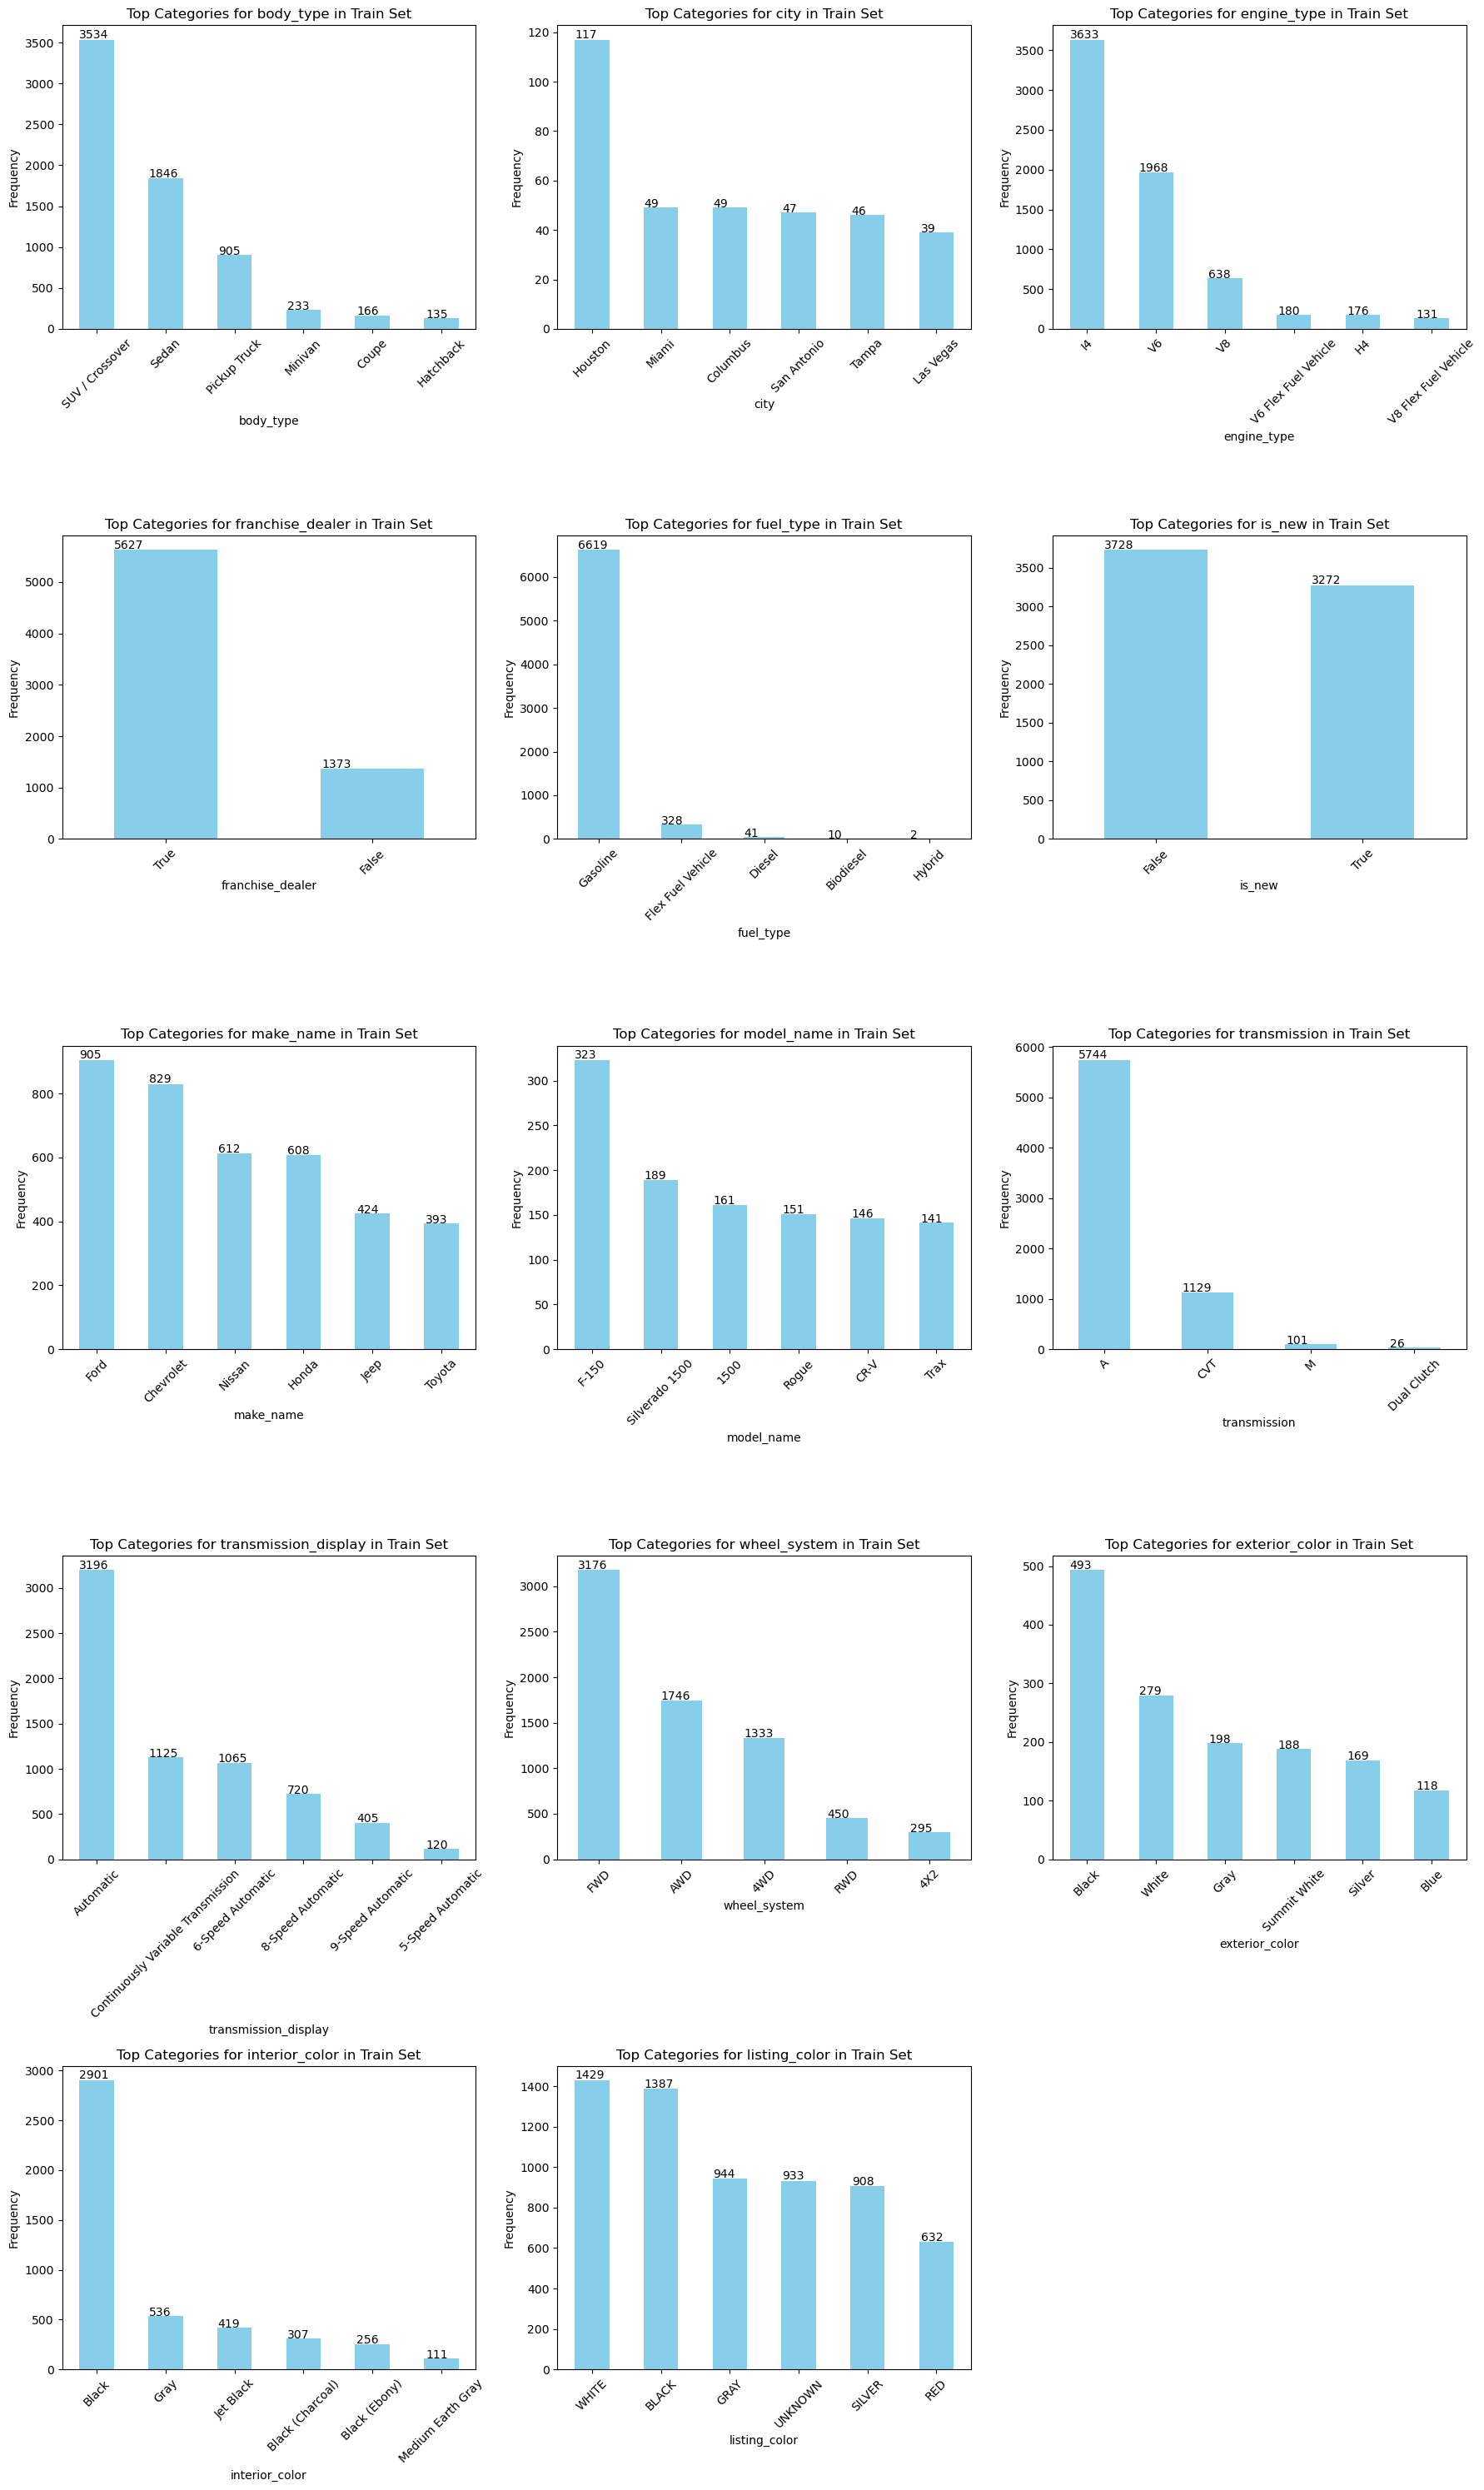

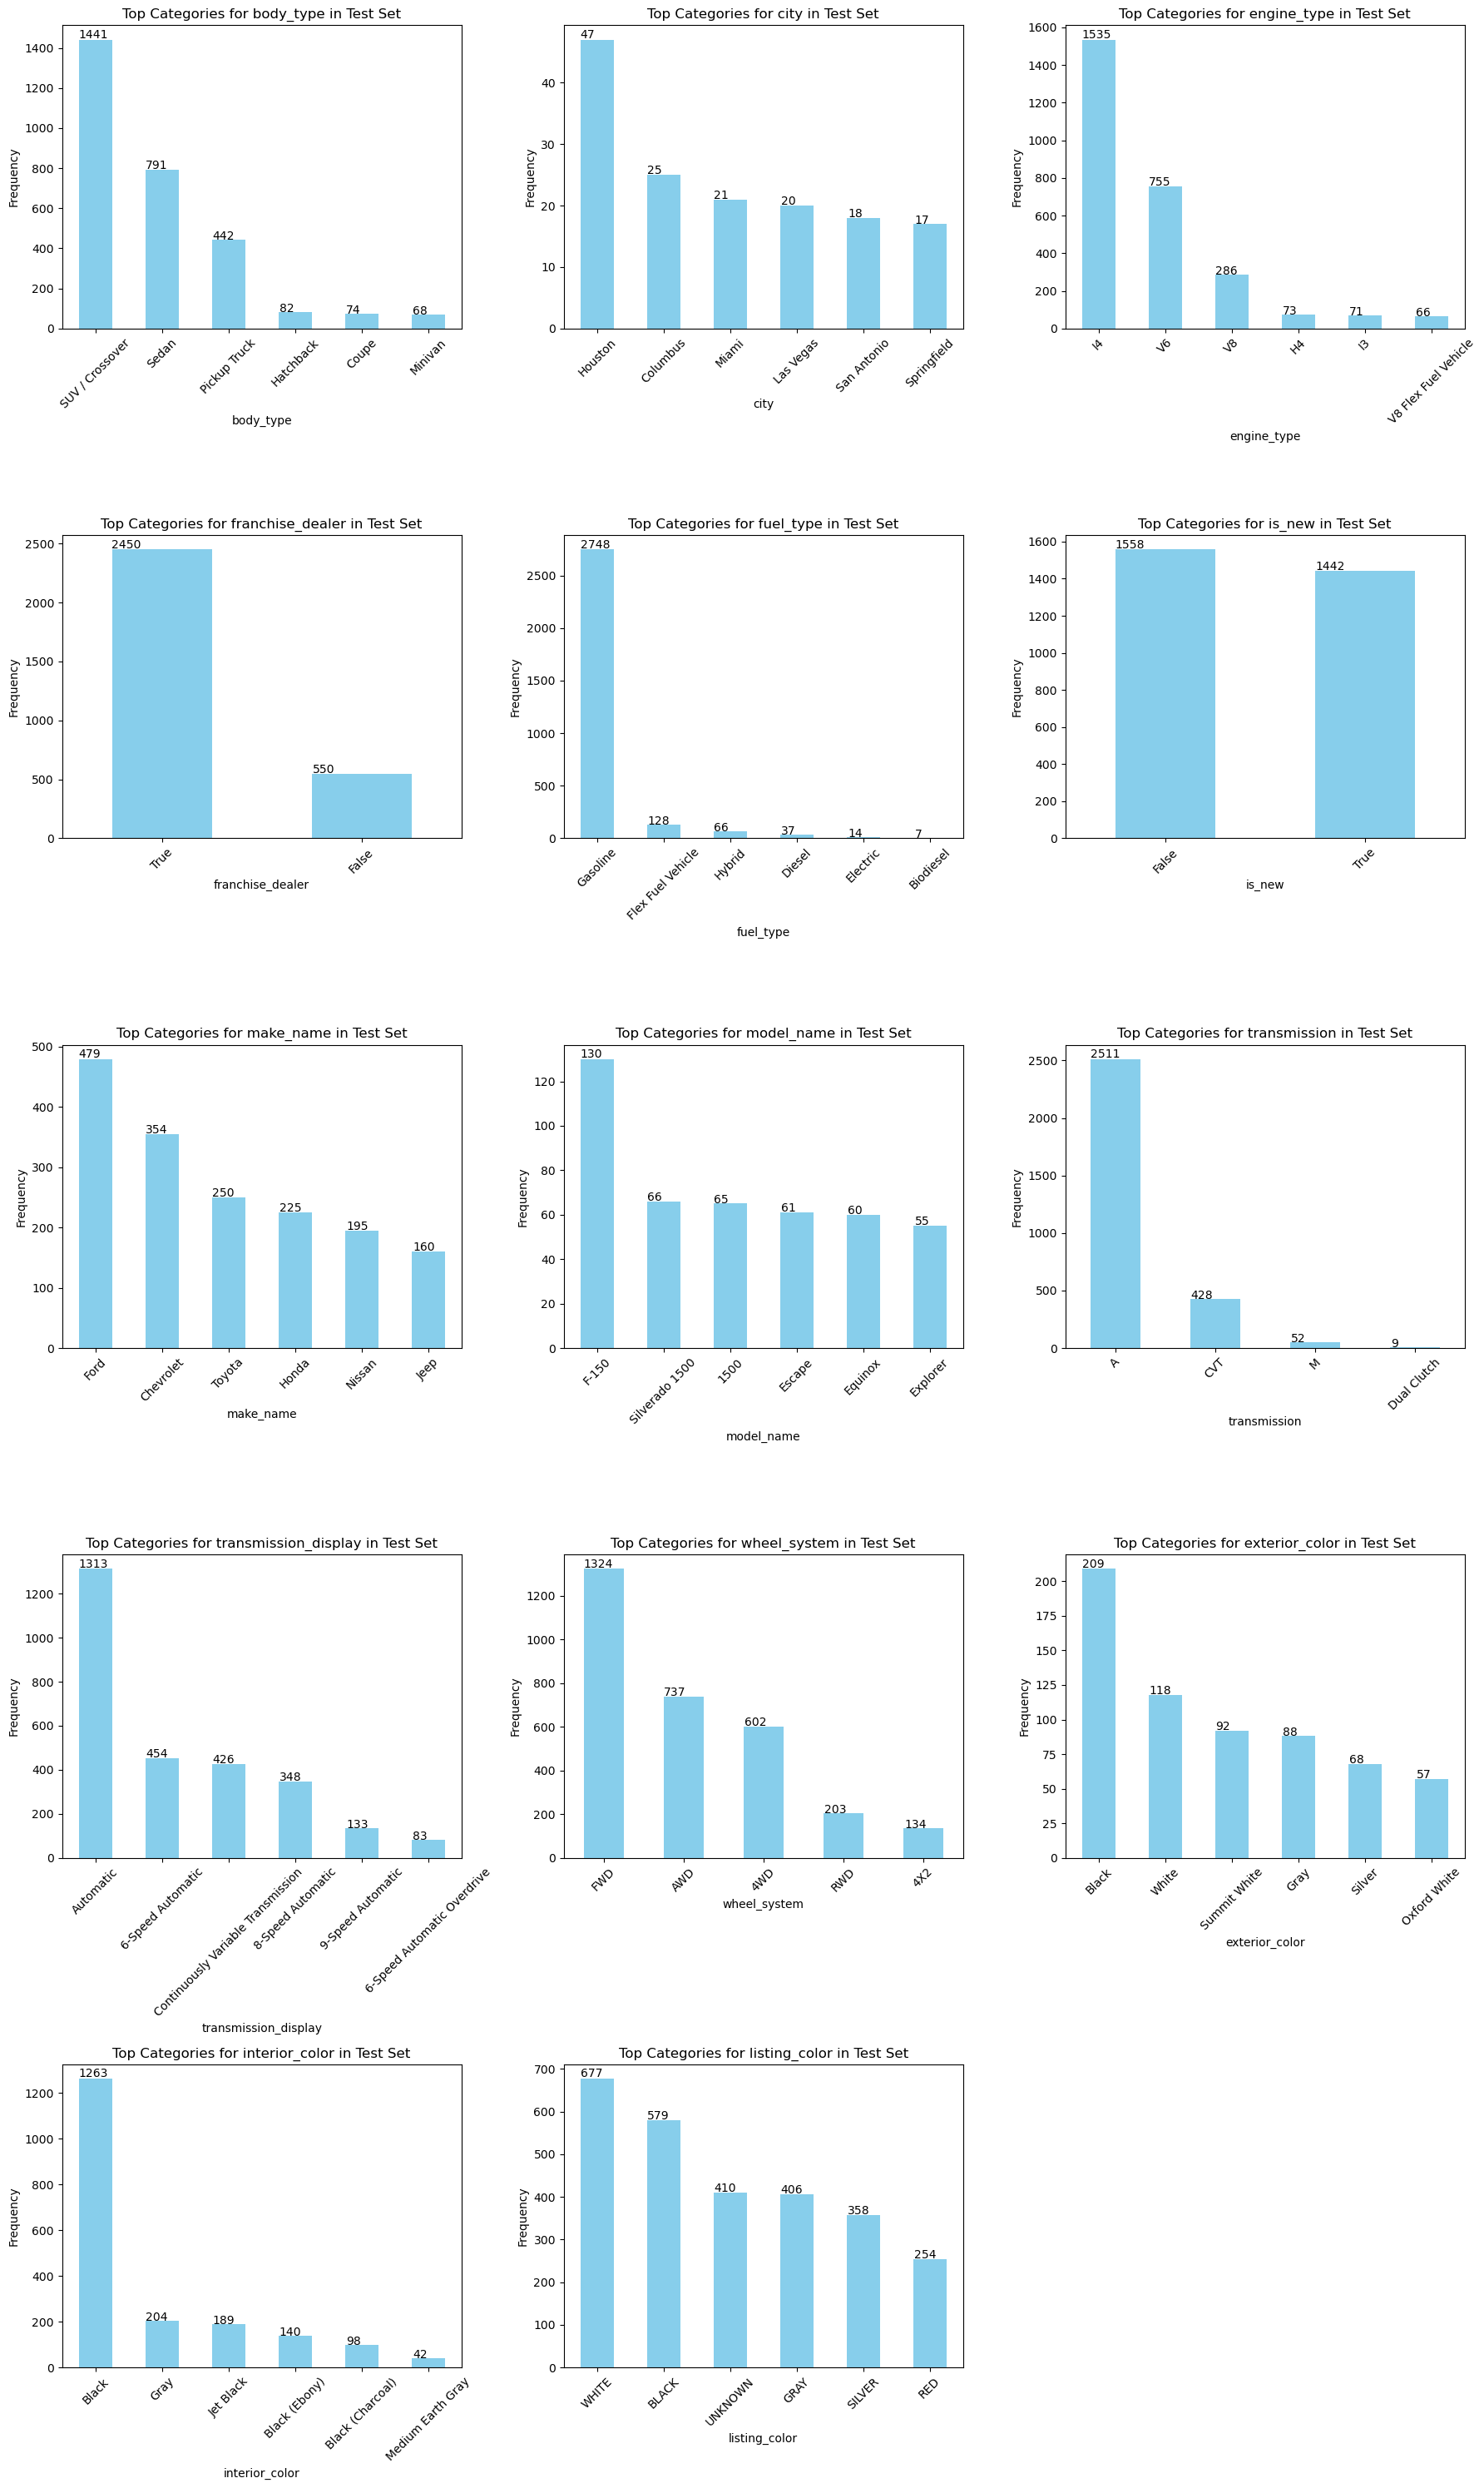

In [63]:
def plot_histograms(top_categories, dataset_name):
    num_columns = 3
    num_rows = (len(top_categories) + num_columns - 1) // num_columns  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 6))
    axes = axes.flatten()  # Flatten the array of axes for easy iteration
    
    for idx, (column, values) in enumerate(top_categories.items()):
        ax = axes[idx]
        values.plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title(f'Top Categories for {column} in {dataset_name}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(values.index, rotation=45)
        
        # Add data labels on top of each bar
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    # Hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Plot histograms for training set
plot_histograms(top5_categories_train, 'Train Set')

# Plot histograms for test set
plot_histograms(top5_categories_test, 'Test Set')

#### Imputing and matching variables to a category

In [64]:
colors = ['blue', 'gray', 'red', 'green', 'silver', 'black', 'white']

# Function to match and replace colors
def match_colors(color):
    for c in colors:
        if re.search(c, color, re.IGNORECASE):
            return c
    return 'other'

# Apply the function to the exterior_color column
for col in color_variables:
    df_train[col] = df_train[col].apply(match_colors)
    df_test[col] = df_test[col].apply(match_colors)

In [65]:
def plot_color_histograms(df_train, df_test, color_variables):
    fig, axes = plt.subplots(len(color_variables), 2, figsize=(15, len(color_variables) * 5))

    for idx, var in enumerate(color_variables):
        # Train set
        ax_train = axes[idx, 0]
        df_train[var].value_counts().plot(kind='bar', ax=ax_train)
        ax_train.set_title(f'Train Set Histogram for {var}')
        ax_train.set_xlabel('Color')
        ax_train.set_ylabel('Frequency')
        
        # Adding data labels
        for p in ax_train.patches:
            ax_train.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
        # Test set
        ax_test = axes[idx, 1]
        df_test[var].value_counts().plot(kind='bar', ax=ax_test)
        ax_test.set_title(f'Test Set Histogram for {var}')
        ax_test.set_xlabel('Color')
        ax_test.set_ylabel('Frequency')
        
        # Adding data labels
        for p in ax_test.patches:
            ax_test.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()


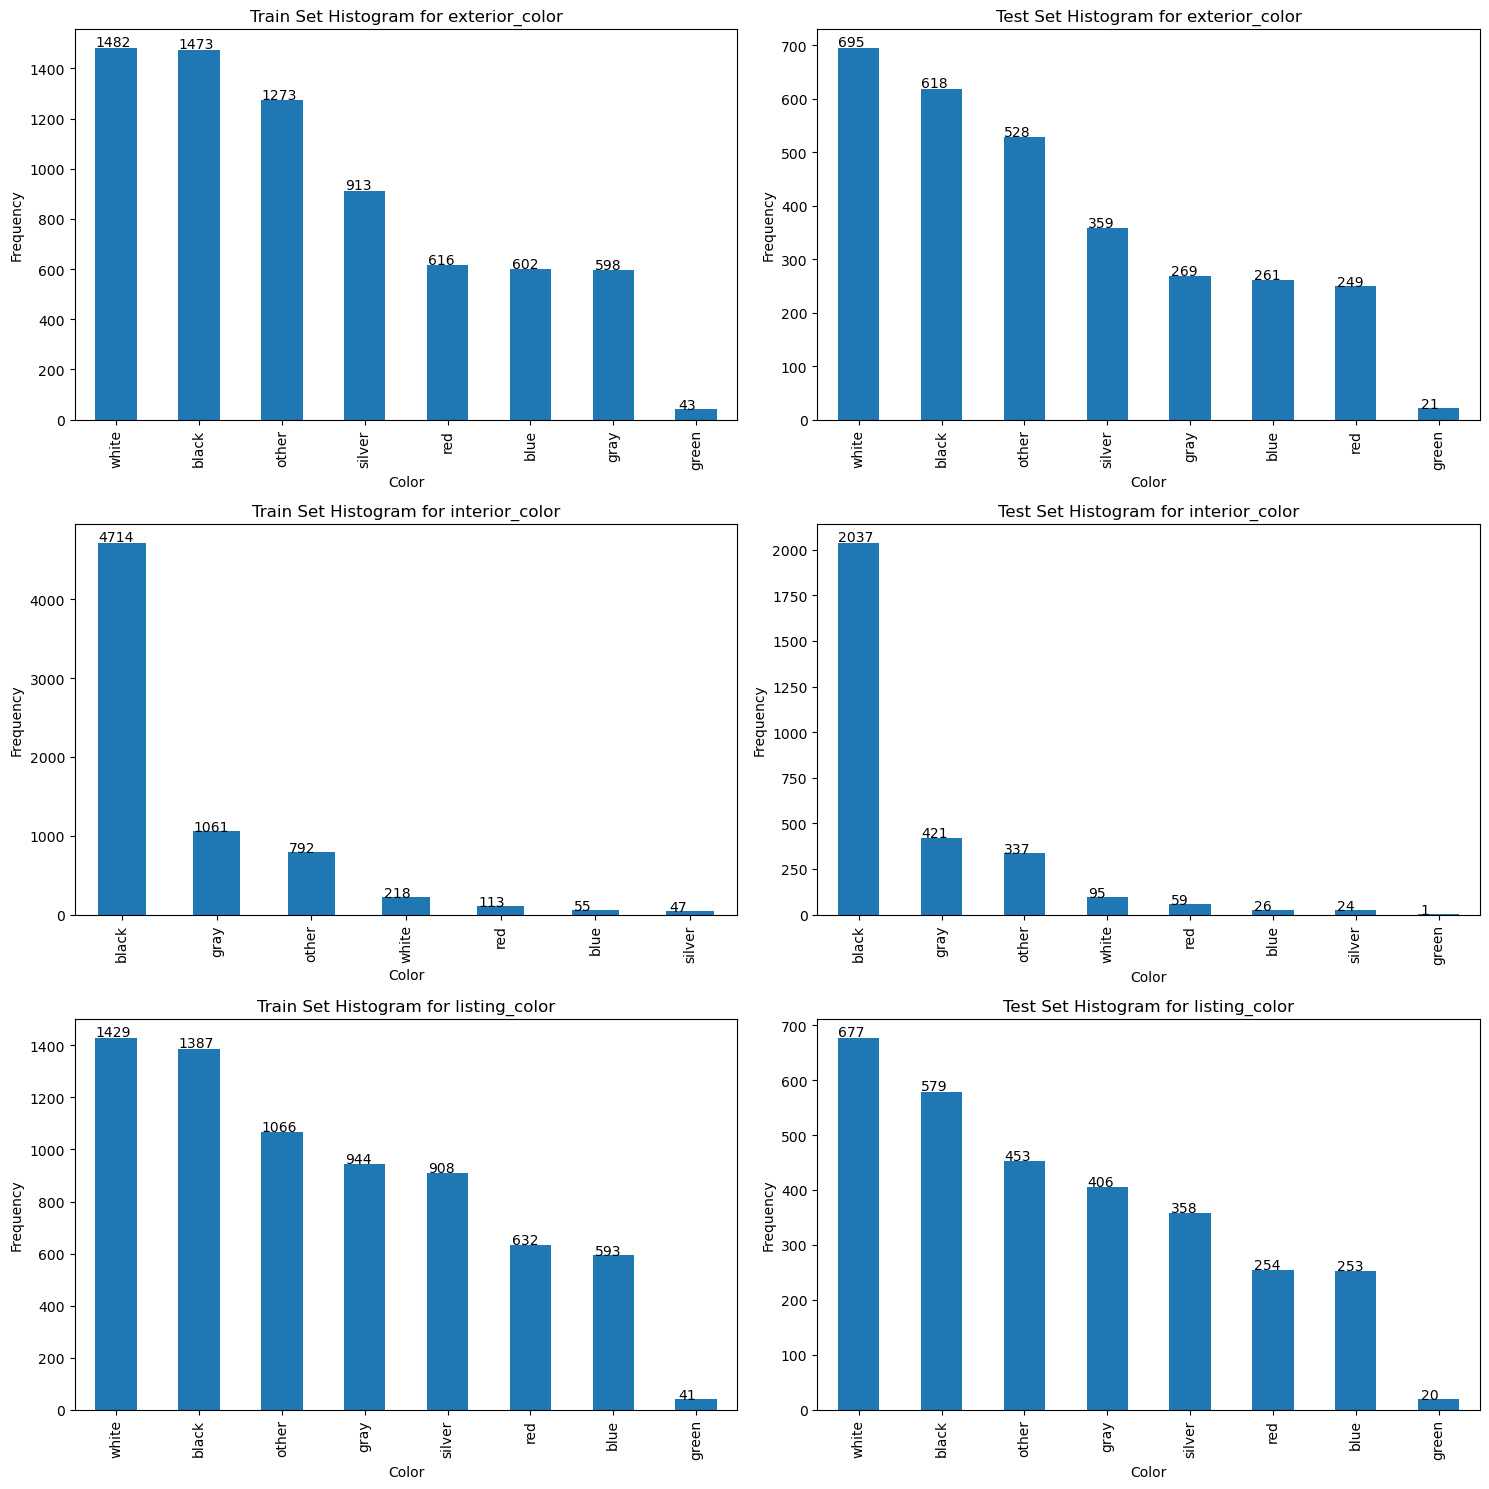

In [66]:
plot_color_histograms(df_train, df_test, color_variables)

We create a function to get the most 5 common of exterior_color, interior_color, listing_color and print out the most 5 frenquecy to map them into 5 basic colors and others

In [67]:
def keep_top_5_colors(df, column, top_5_colors=None):
    if top_5_colors is None:
        # Determine top 5 colors in the training set
        top_5_colors = df[column].value_counts().nlargest(6).index
    # Replace colors not in top 5 with 'other'
    df[column] = df[column].apply(lambda x: x if x in top_5_colors else 'other')
    return top_5_colors

# Process each color variable for both train and test datasets
for col in color_variables:
    # Keep top 5 colors in train set and get the list of top 5 colors
    top_5_colors = keep_top_5_colors(df_train, col)
    # Apply the same top 5 colors to the test set
    keep_top_5_colors(df_test, col, top_5_colors)

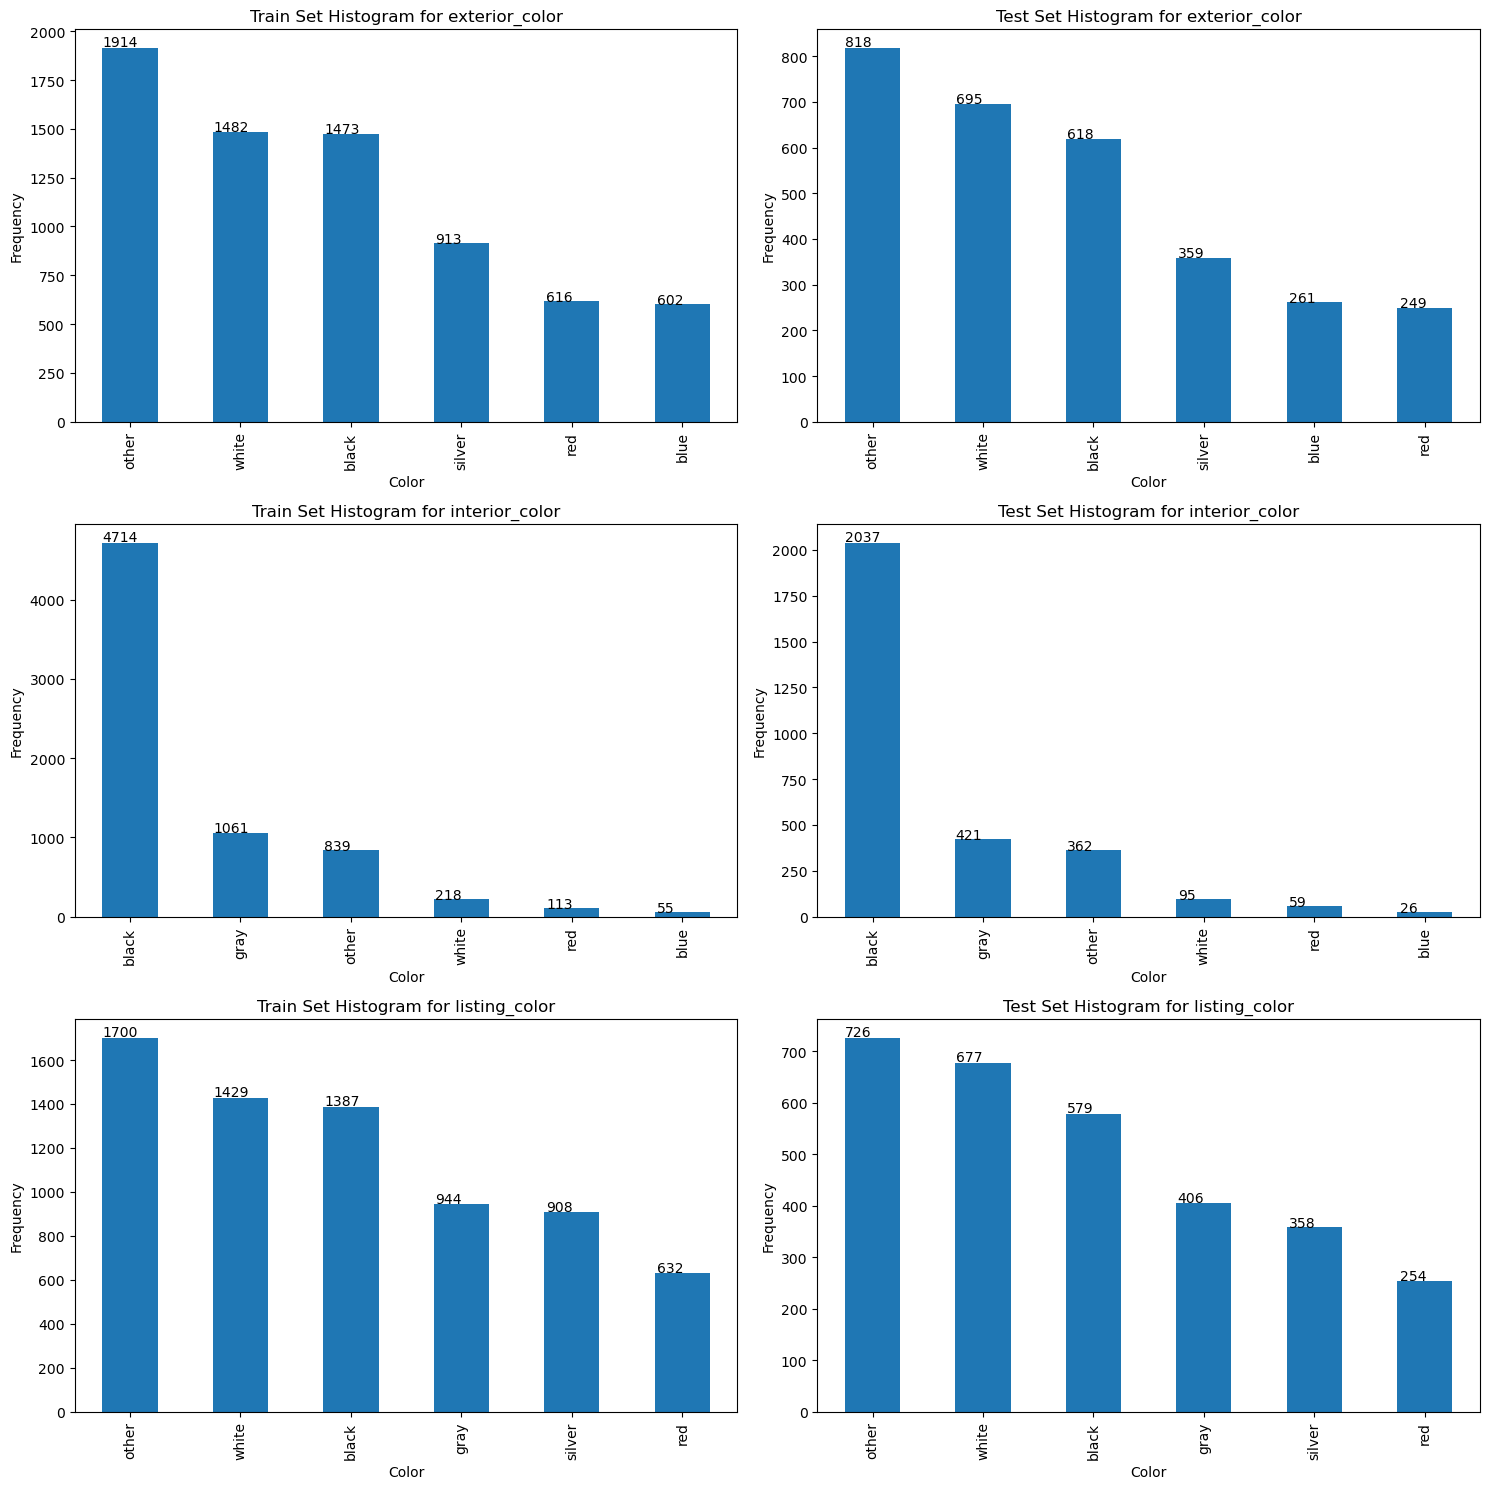

In [68]:
plot_color_histograms(df_train, df_test, color_variables)

Similar to color, get the top 5 categories to map 5 most frequency and merge the rest into other

In [69]:
# Function to keep top 5 categories and rename others to 'others'
def keep_top_5_categories_train(df, column):
    top_5_categories = df[column].value_counts().nlargest(5).index
    df[column] = df[column].apply(lambda x: x if x in top_5_categories else 'others')
    return top_5_categories

def keep_top_5_categories_test(df, column, top_5_categories):
    df[column] = df[column].apply(lambda x: x if x in top_5_categories else 'others')

# Apply the function to each categorical variable
for col in cat_variables:
    top_5_categories = keep_top_5_categories_train(df_train, col)
    keep_top_5_categories_test(df_test, col, top_5_categories)

In [70]:
def plot_categorical_histograms(df_train, df_test, cat_variables):
    fig, axes = plt.subplots(len(cat_variables), 2, figsize=(15, len(cat_variables) * 5))

    for idx, var in enumerate(cat_variables):
        # Train set
        ax_train = axes[idx, 0]
        df_train[var].value_counts().plot(kind='bar', ax=ax_train)
        ax_train.set_title(f'Train Set Histogram for {var}')
        ax_train.set_xlabel('Category')
        ax_train.set_ylabel('Frequency')
        
        # Adding data labels
        for p in ax_train.patches:
            ax_train.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
        # Test set
        ax_test = axes[idx, 1]
        df_test[var].value_counts().plot(kind='bar', ax=ax_test)
        ax_test.set_title(f'Test Set Histogram for {var}')
        ax_test.set_xlabel('Category')
        ax_test.set_ylabel('Frequency')
        
        # Adding data labels
        for p in ax_test.patches:
            ax_test.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()

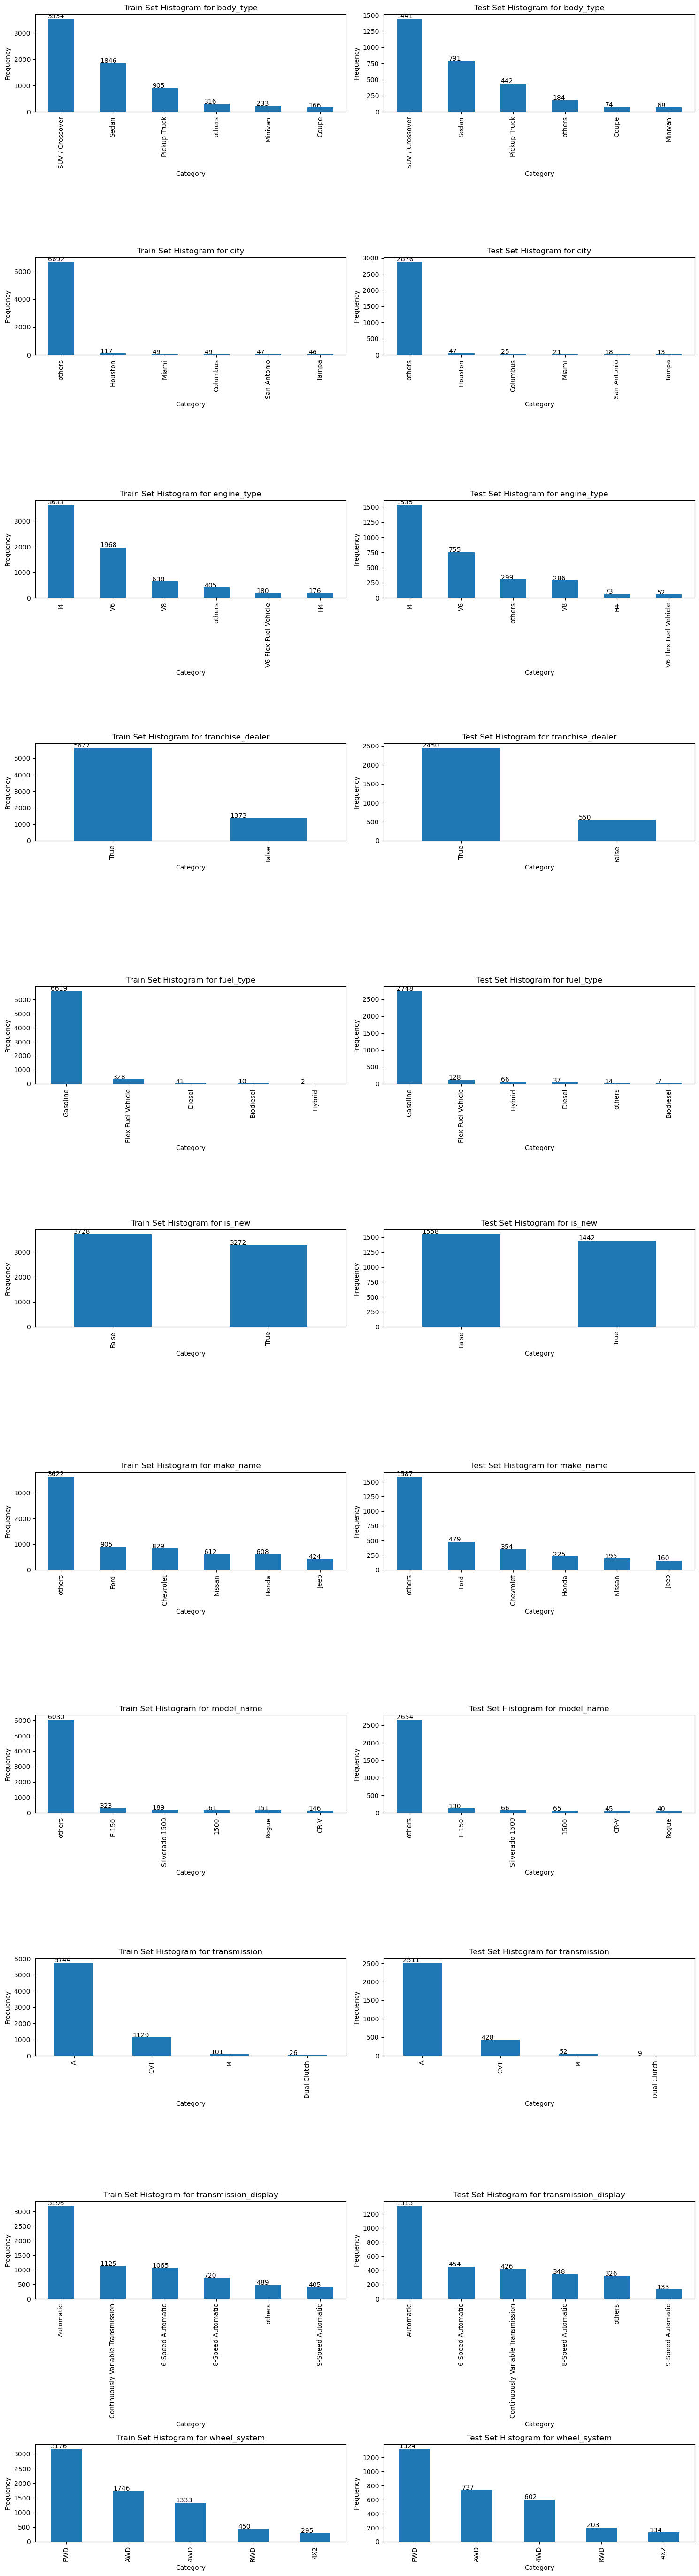

In [71]:
plot_categorical_histograms(df_train, df_test, cat_variables)

#### OneHotEncoding

In [72]:
dummy_enc = ['exterior_color', 'interior_color', 'listing_color', 'body_type', 'engine_type', 'fuel_type', 'transmission_display', 'wheel_system']

dftrain_encoded = pd.get_dummies(df_train, columns=dummy_enc)
dftest_encoded = pd.get_dummies(df_test, columns=dummy_enc)

# Identify dummy columns
dummy_columns = [col for col in dftrain_encoded.columns if any(dummy in col for dummy in dummy_enc)]
# Convert dummy columns to integers
dftrain_encoded[dummy_columns] = dftrain_encoded[dummy_columns].astype(int)


# Identify dummy columns
dummy_columns = [col for col in dftest_encoded.columns if any(dummy in col for dummy in dummy_enc)]
# Convert dummy columns to integers
dftest_encoded[dummy_columns] = dftest_encoded[dummy_columns].astype(int)


After encoding, dummy variables were different between train and test set, need to go back to categorising both dataframes with the same categories

#### Label Encoding

vin, city have a large range of values, hence we use labelencoding to increase efficiency. franchise dealer, is_new and listed_date were binary, so there was no need to create dummy variables.  We found that make_name and `model_name had explanatory power and correlation with price when encoded as such rather than as dummies.

In [73]:
ord_enc = ['vin', 'city', 'make_name', 'model_name', 'franchise_dealer', 'is_new', 'transmission', 'listed_date']
#vin, city, franchise dealer, is_new and listed_date have a large range of values, hence we use labelencoding to increase efficiency.
#we found that make_name and model_name had explanatory power and correlation with price when encoded as such rather than as dummies.

from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate over each variable and encode its categories
for column in ord_enc:
    dftrain_encoded[column] = label_encoder.fit_transform(df_train[column])
    dftest_encoded[column] = label_encoder.fit_transform(df_test[column])

print ("Train Set \n",dftrain_encoded[ord_enc] ,"\n\n","Test Set", "\n", dftest_encoded[ord_enc])

Train Set 
        vin  city  make_name  model_name  franchise_dealer  is_new  \
0     2767     5          2           5                 1       1   
1     3952     1          5           5                 1       0   
2     6633     5          5           5                 1       0   
3     2709     5          5           5                 0       0   
4     4627     5          4           3                 1       1   
...    ...   ...        ...         ...               ...     ...   
6995  1711     5          0           5                 1       1   
6996  2220     5          4           5                 0       0   
6997  6465     5          2           5                 1       0   
6998  4346     5          2           5                 1       1   
6999  2154     5          4           5                 1       0   

      transmission  listed_date  
0                1          280  
1                0          452  
2                0          455  
3                0     

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

#### OLS Multiple Regression

Using Ordinary Least Squares Regression to find significant variables against price

We use Ordinary Least Squares (OLS) regression to identify significant features related to 'price' to determine which variables influence the price. The results from the OLS regression analysis show that almost all the variables listed have a p-value less than 0.05, indicating that they are statistically significant contributors to predicting the price in this model. Except for longtitude and age, other features all have the p-value of 0.

In [74]:
import statsmodels.api as sm
#Ordinary Least Squares Multiple Regression to investigate significant variables to price.

# Separate dependent and independent variables
X1 = dftrain_encoded.drop('price', axis=1)
y = dftrain_encoded['price']

# Add a constant to the independent variables
X1 = sm.add_constant(X1)

# Fit the multiple linear regression model
model = sm.OLS(y, X1).fit()

# Get the summary table
summary_table = model.summary().tables[1]

# Convert the summary table to a DataFrame
summary_df = pd.DataFrame(summary_table.data)

# Get the first row as a Series (column names)
new_columns = summary_df.iloc[0]

# Set the new column names
summary_df.columns = new_columns

# Drop the first row (which is the old column names)
summary_df = summary_df.iloc[1:]

# Convert the p-values column to float
summary_df['P>|t|'] = summary_df['P>|t|'].astype(float)

# Select features with p-values less than 0.05
significant_features = summary_df.loc[summary_df['P>|t|'] < 0.05, ['', 'P>|t|']]

# Display the significant features and their p-values
print(significant_features)

0                         P>|t|
2                    vin  0.000
3           back_legroom  0.000
5      city_fuel_economy  0.000
8    engine_displacement  0.000
9       franchise_dealer  0.010
11      fuel_tank_volume  0.000
13  highway_fuel_economy  0.000
14            horsepower  0.000
15                is_new  0.000
17                length  0.000
19             longitude  0.017
20             make_name  0.000
21       maximum_seating  0.000
22               mileage  0.000
23            model_name  0.000
24        savings_amount  0.000
25         seller_rating  0.000
27             wheelbase  0.000
28                 width  0.000
32        maximum_torque  0.000
36                   age  0.033


**Task 2, Question 6**: Perform some EDA to measure the relationship between the features and the target and carefully explain your findings. 
(2 marks)

#### Correlation Matrices and Analysis

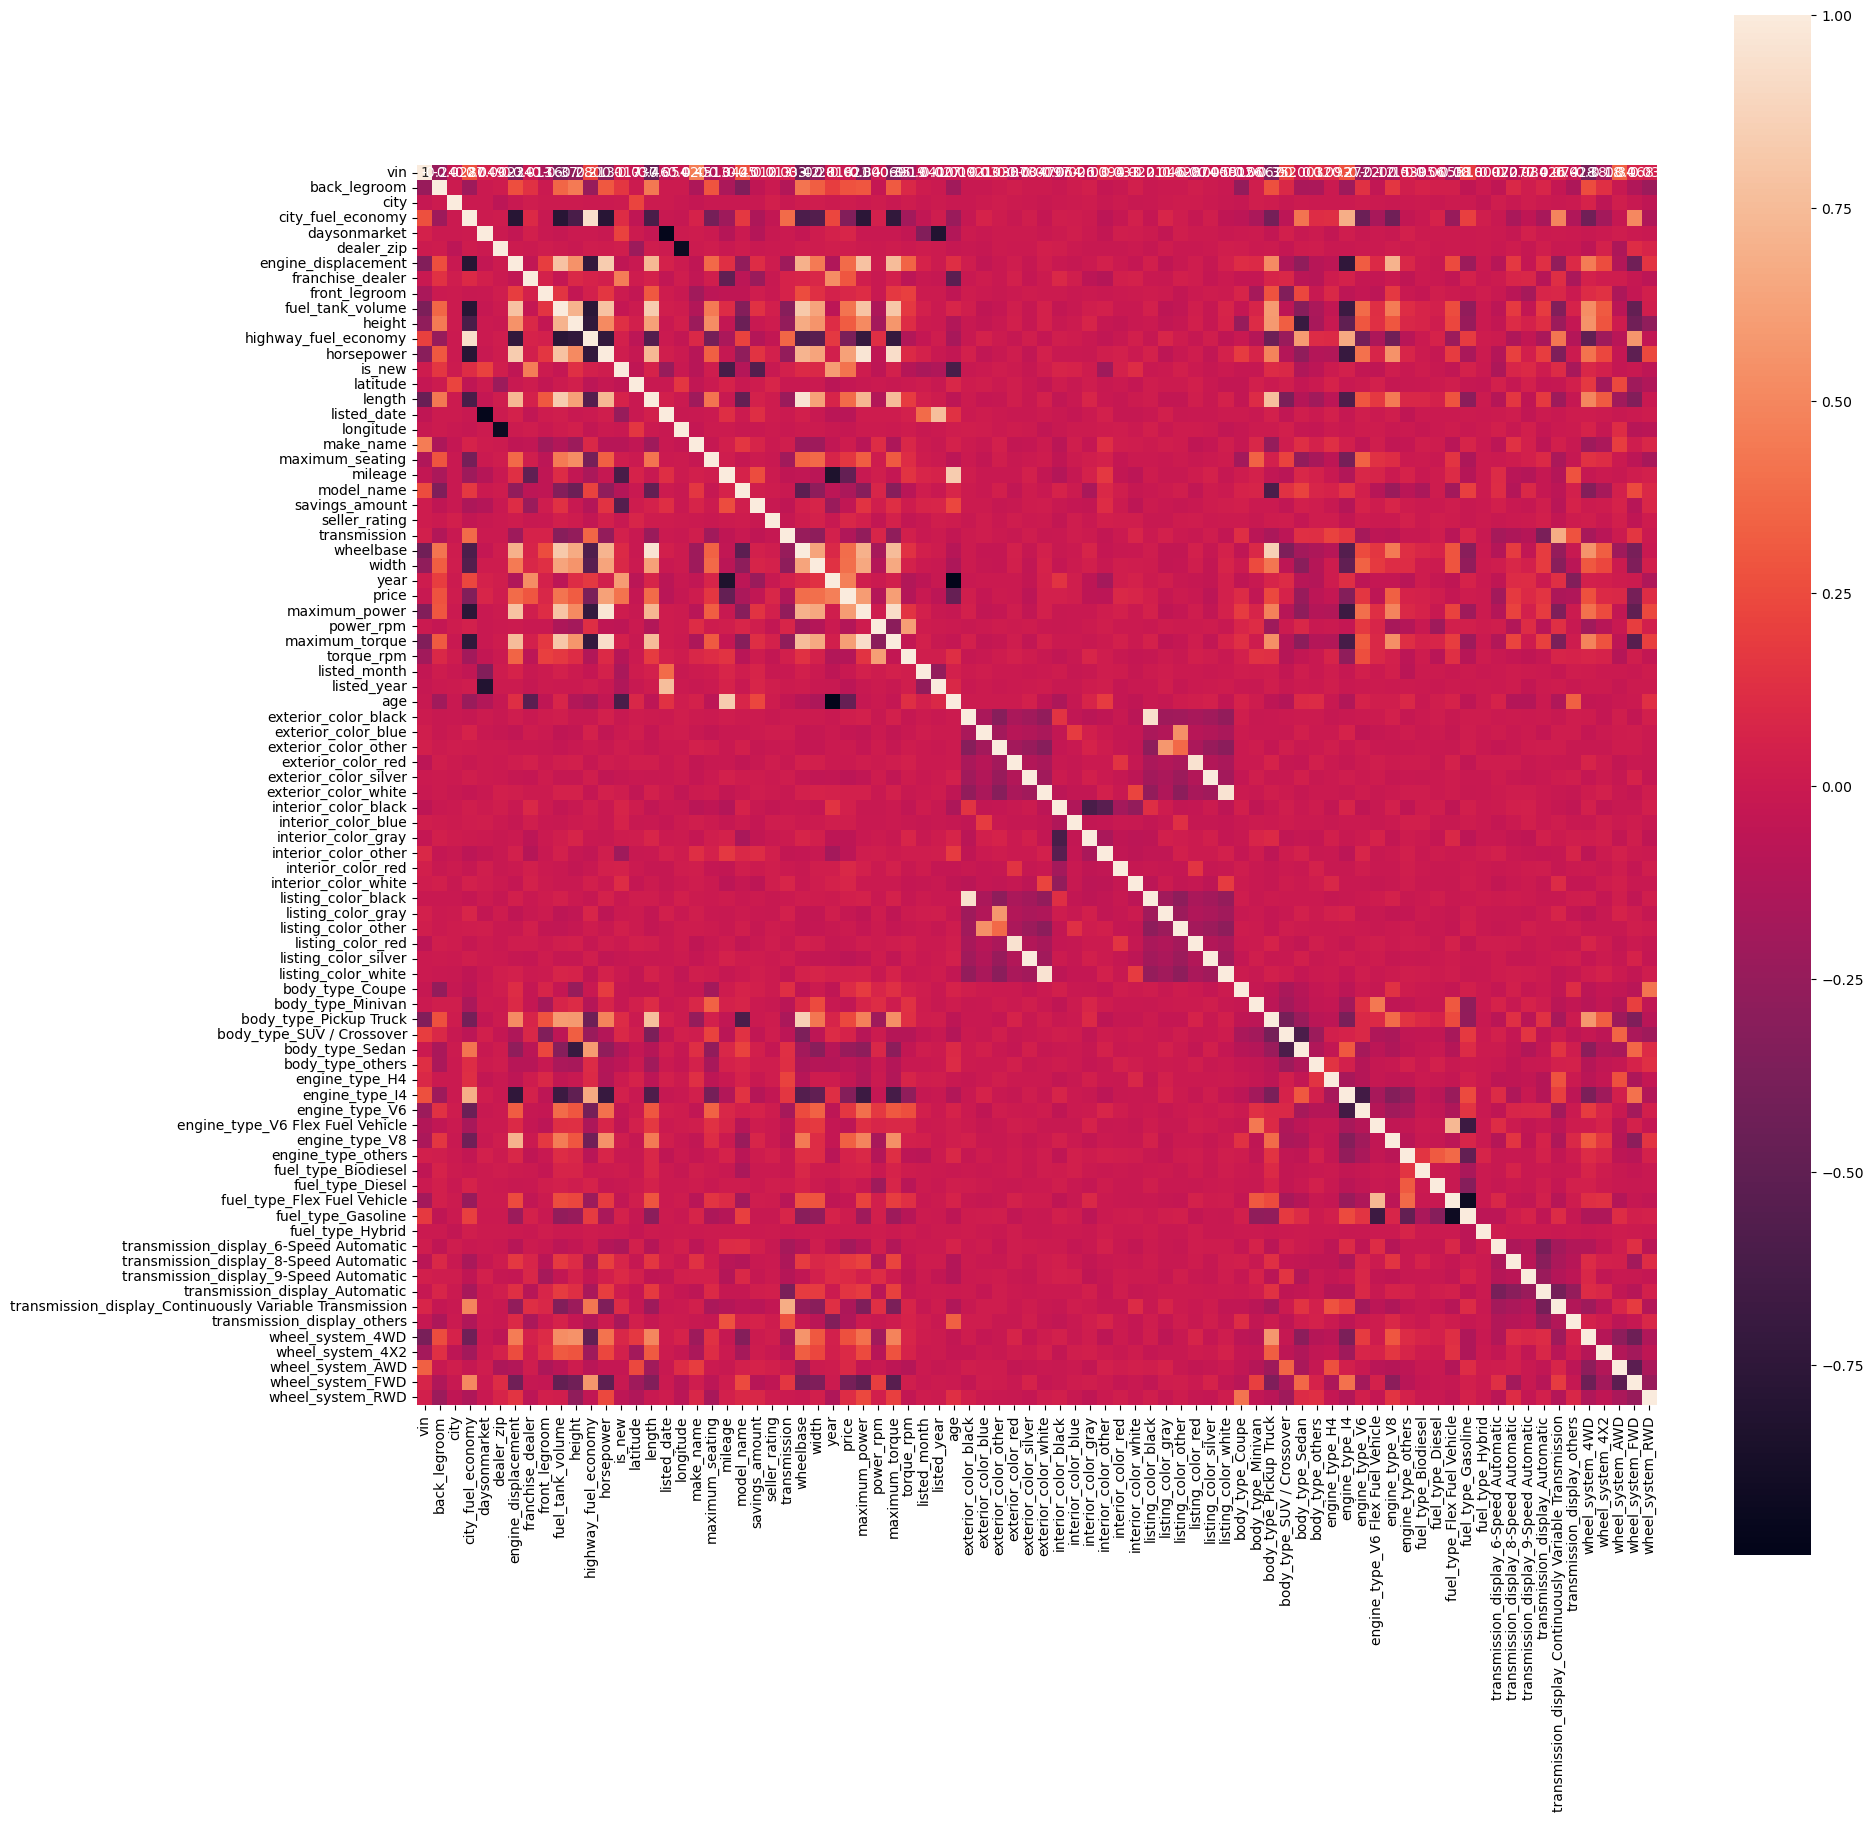

In [75]:
corr = dftrain_encoded.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmax=1, square=True)
plt.show()

 The correlation matrix shows that features like horsepower, maximum_torque, and maximum_power show a strong positive correlations with the price, indicating a strong linear relationship, where increases in these features significantly affect the price. The heatmap reveals relatively weaker or no significant correlations with exterior, interior, and listing color variables, suggesting these features might not directly influence price linearly or significantly.

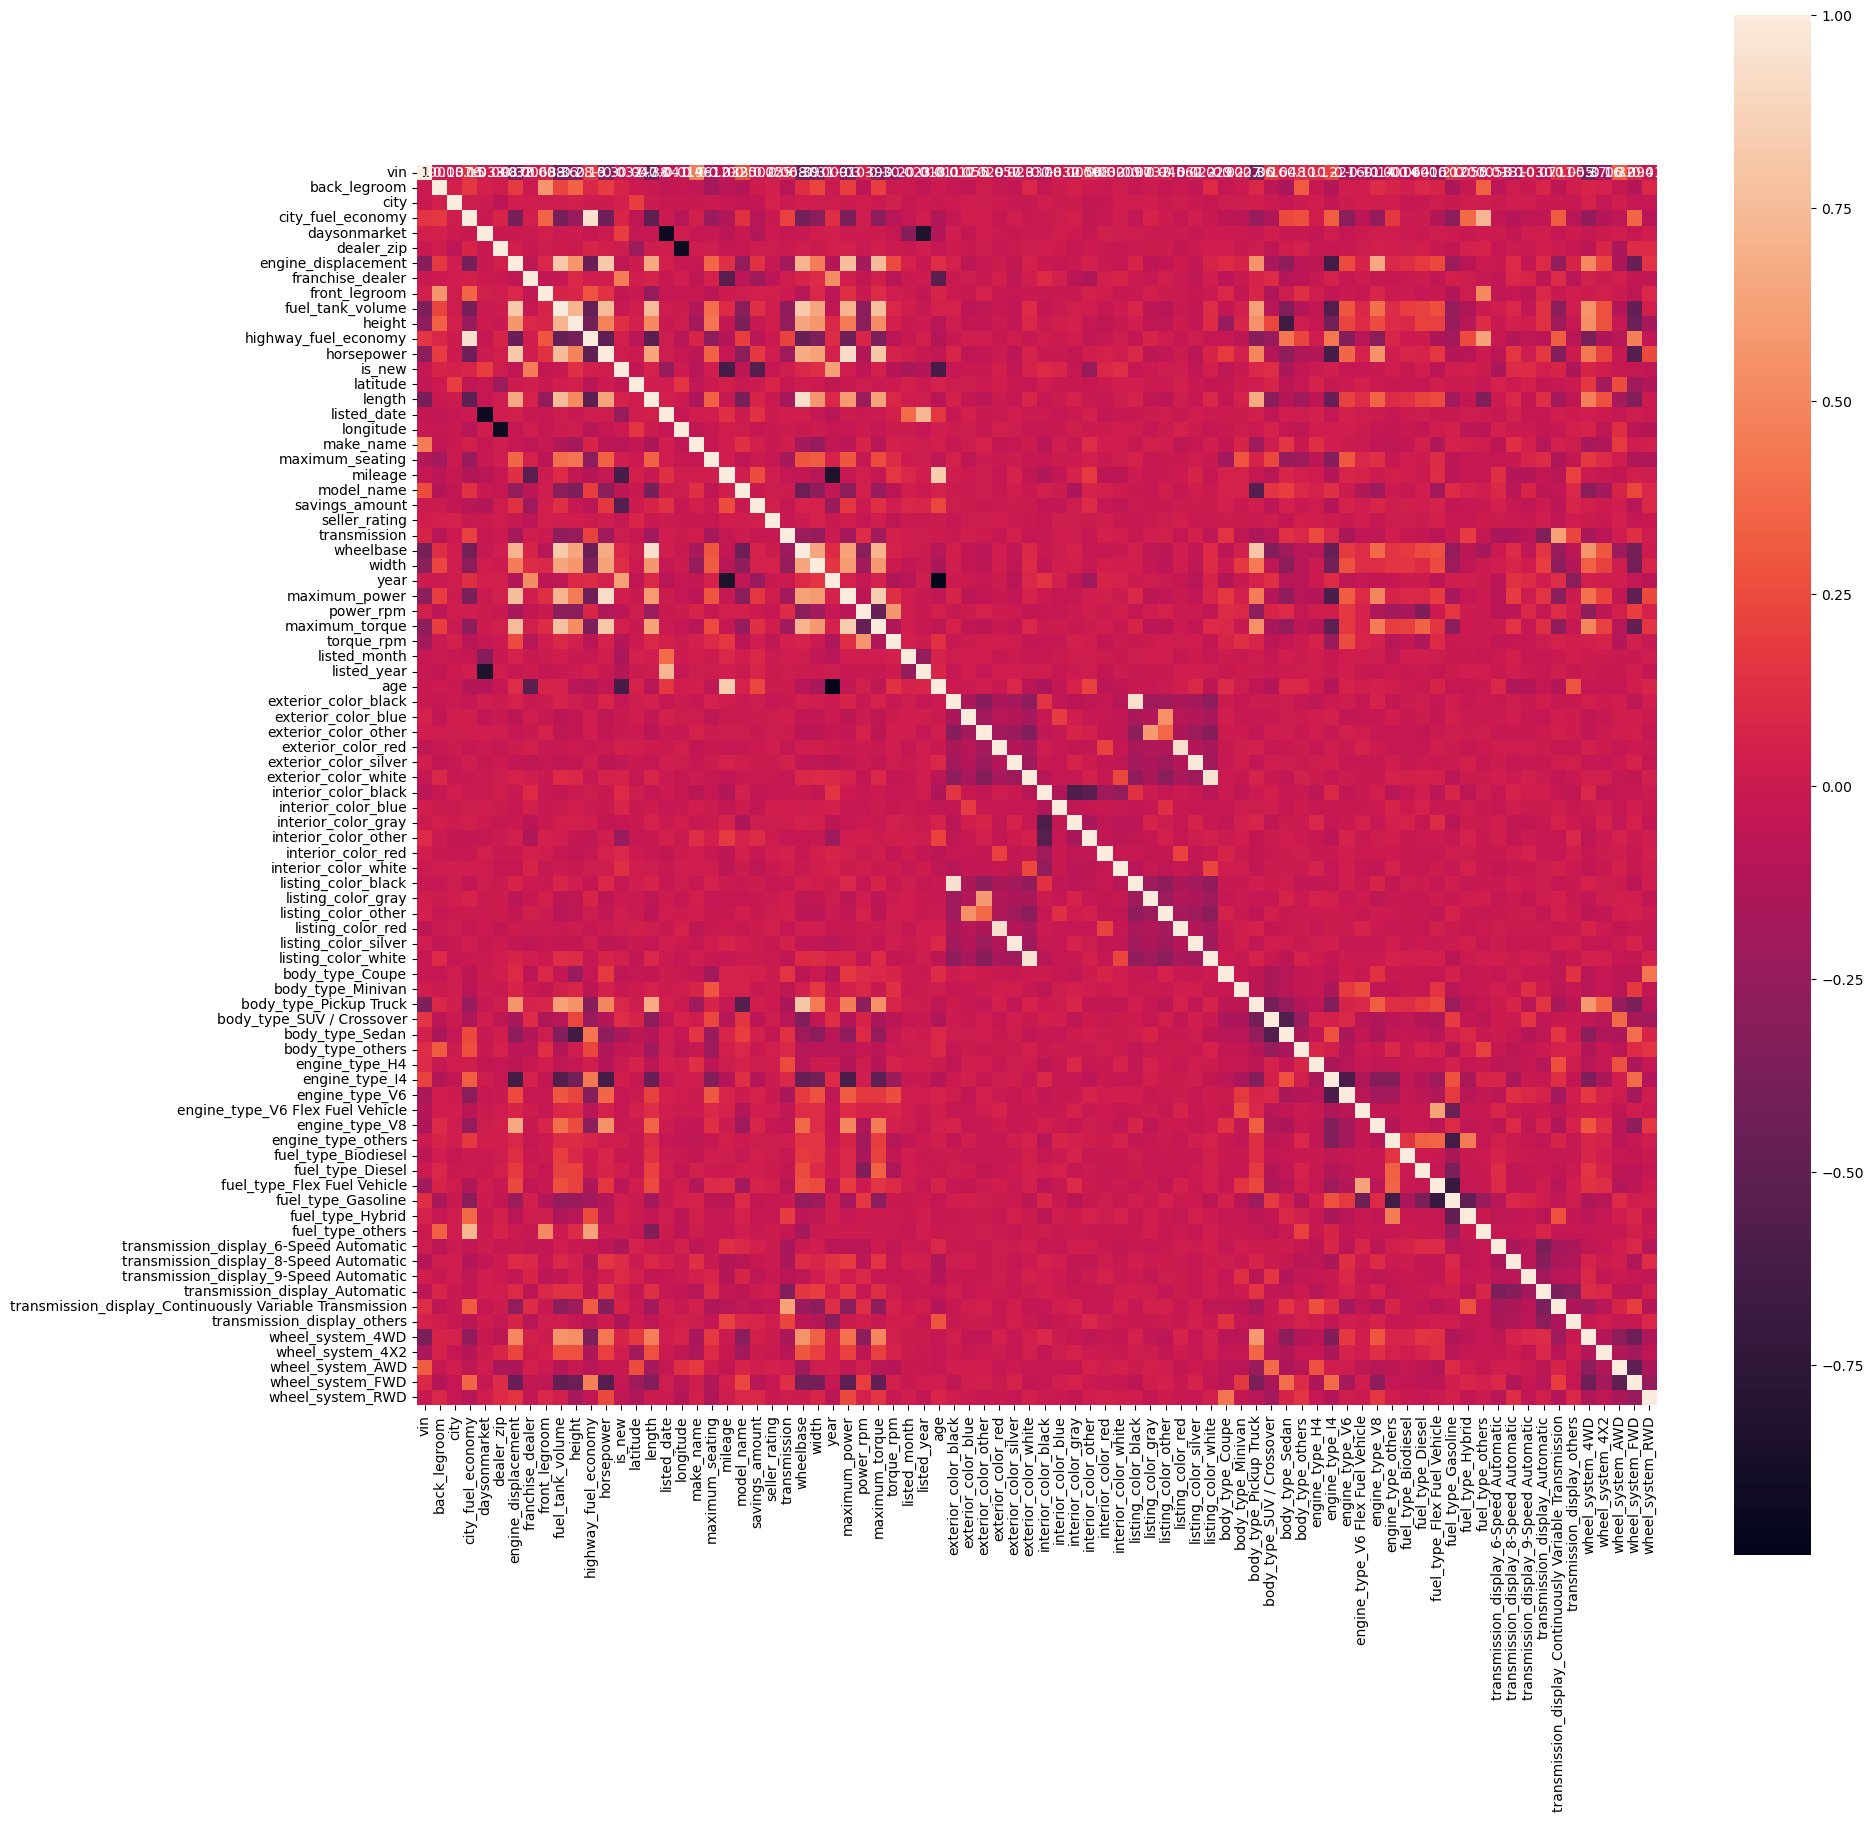

In [76]:
corr = dftest_encoded.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmax=1, square=True)
plt.show()

#### Identifying highly correlated features

In [77]:
def find_highly_correlated_features(df, threshold=0.85):
    """
    Find highly correlated features from the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with encoded features.
    threshold (float): The threshold for high correlation.

    Returns:
    DataFrame: A DataFrame with highly correlated features removed.
    """
    corr_matrix = df.corr().abs()

    # Identify pairs of highly correlated features
    high_corr_pairs = np.where(corr_matrix > threshold)
    high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

    # Print highly correlated pairs
    print("Highly correlated pairs:")
    for pair in high_corr_pairs:
        print(pair)

    # Remove one feature from each pair
    # Here we choose to drop the second feature in each pair arbitrarily. You might use domain knowledge or other criteria to decide.
    features_to_drop = set([pair[1] for pair in high_corr_pairs])
    df_reduced = df.drop(columns=features_to_drop)

    return df_reduced

High correlation characteristics should be eliminated from the model because they cause multicollinearity, which makes it difficult to determine which features are actually crucial for predicting the target variables. Multicollinearity-affected data may hinder a model's ability to generalise well to fresh, untrained data. Because of multicollinearity, the model is less resilient to changes in the data because it depends more on the particular associations found in the training set. The final collection of features is as follows after those were eliminated.

In [78]:
df_train_reduced = find_highly_correlated_features(dftrain_encoded, threshold=0.85)

Highly correlated pairs:
('city_fuel_economy', 'highway_fuel_economy')
('daysonmarket', 'listed_date')
('dealer_zip', 'longitude')
('horsepower', 'maximum_power')
('horsepower', 'maximum_torque')
('length', 'wheelbase')
('wheelbase', 'body_type_Pickup Truck')
('year', 'age')
('maximum_power', 'maximum_torque')
('exterior_color_black', 'listing_color_black')
('exterior_color_red', 'listing_color_red')
('exterior_color_silver', 'listing_color_silver')
('exterior_color_white', 'listing_color_white')
('fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline')


In [79]:
df_test_reduced = find_highly_correlated_features(dftest_encoded, threshold=0.85)

Highly correlated pairs:
('city_fuel_economy', 'highway_fuel_economy')
('daysonmarket', 'listed_date')
('dealer_zip', 'longitude')
('horsepower', 'maximum_power')
('length', 'wheelbase')
('year', 'age')
('exterior_color_black', 'listing_color_black')
('exterior_color_red', 'listing_color_red')
('exterior_color_silver', 'listing_color_silver')
('exterior_color_white', 'listing_color_white')


In [80]:
significant_featureslist = significant_features.iloc[:, 0].tolist()

Correlations of significant features with 'price':
price                   1.000000
horsepower              0.618147
maximum_torque          0.602940
mileage                 0.480523
age                     0.466730
fuel_tank_volume        0.415923
is_new                  0.407299
width                   0.398082
wheelbase               0.385918
length                  0.382043
engine_displacement     0.378950
highway_fuel_economy    0.371216
city_fuel_economy       0.340206
franchise_dealer        0.295939
back_legroom            0.275019
maximum_seating         0.160738
model_name              0.147009
seller_rating           0.084056
savings_amount          0.047843
longitude               0.024511
vin                     0.020650
make_name               0.012707
Name: price, dtype: float64


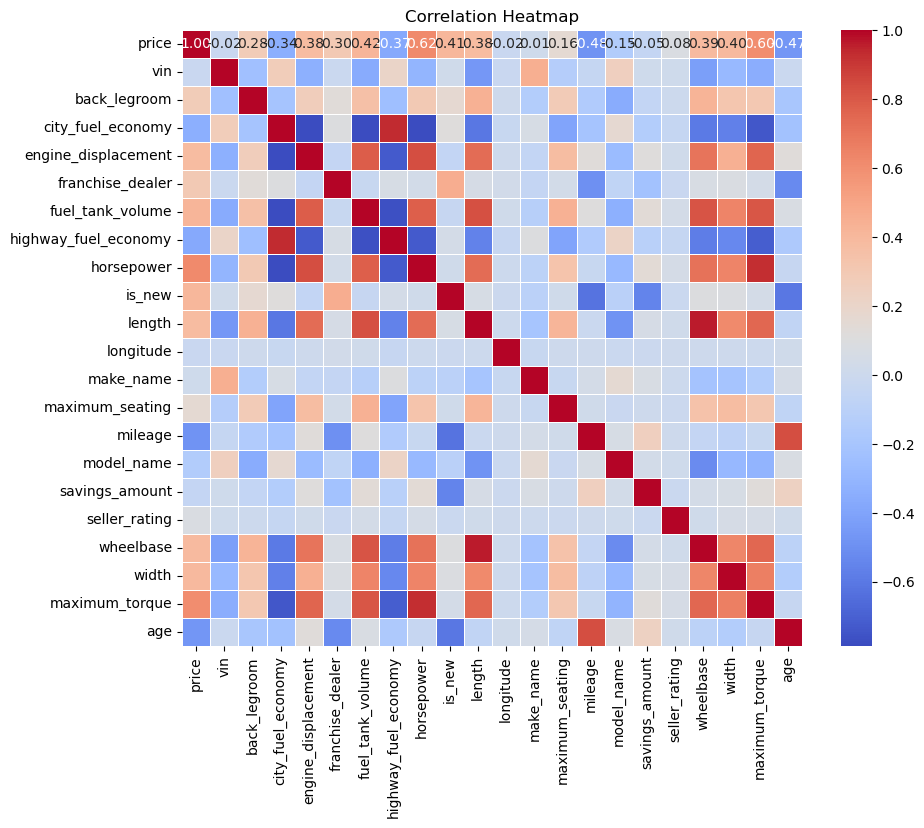

In [39]:
# Selecting the columns
columns = ['price'] + significant_featureslist
df_filtered = dftrain_encoded[columns].copy()

# Compute the correlation of each feature with 'price'
correlations = df_filtered.corr()['price'].abs().sort_values(ascending=False)

# Filter to get the correlations with only the specified features
filtered_correlations = correlations.loc[significant_featureslist]

# Print the correlations
print("Correlations of significant features with 'price':")
print(correlations)
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation analysis reveals that certain vehicle characteristics are strongly associated with price. The features horsepower, maximum_torque, and maximum_power exhibit significant positive correlations with price, showing correlation values of approximately 0.62, 0.60, and 0.48 respectively. These correlations suggest that vehicles with higher horsepower, torque, and power are generally priced higher. In contrast, vin and make name show the least correlated with price, accounting for 0.02 and 0.012 respectively.

#### Analysis of Selected Features

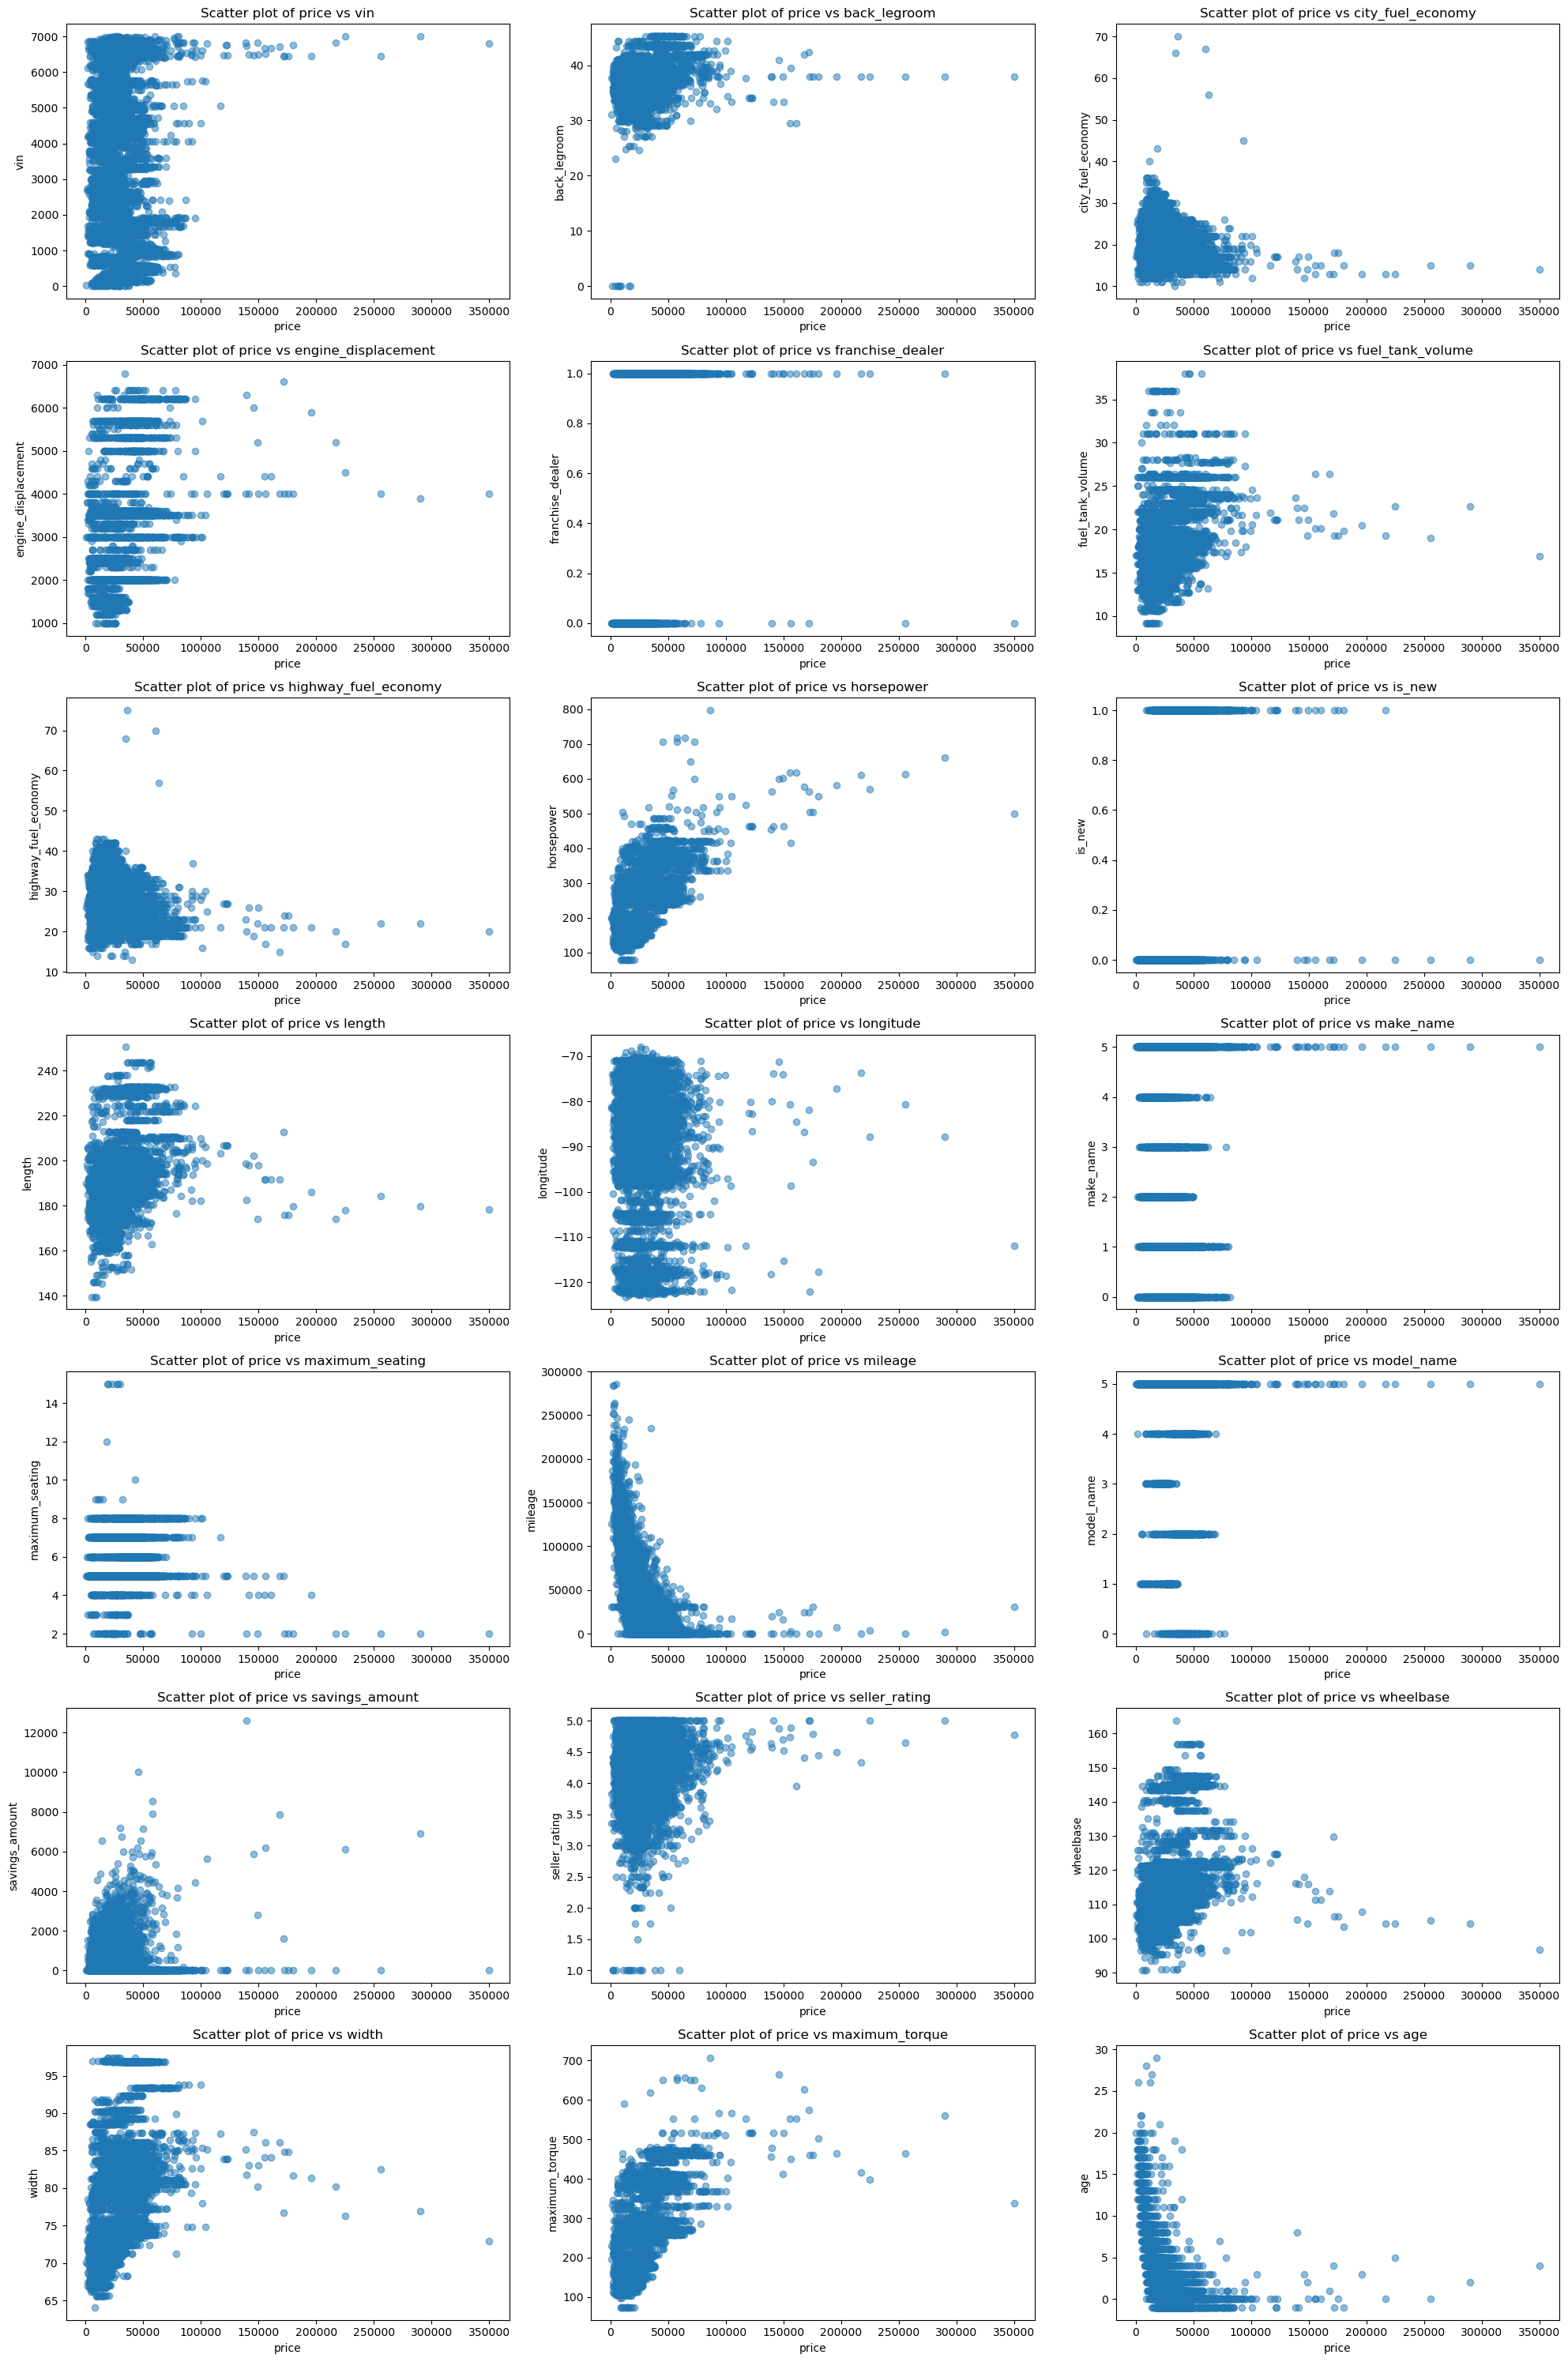

In [40]:
target = 'price'
# Create scatter plots
plt.figure(figsize=(20, 30))  # Adjust the size as needed
for i, feature in enumerate(significant_featureslist, 1):
    plt.subplot(7, 3, i)
    plt.scatter(dftrain_encoded[target],dftrain_encoded[feature], alpha=0.5)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.title(f'Scatter plot of {target} vs {feature}')

plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

The scatter plots suggest strong correlation between horsepower, mileage, age, engine displacement and price. Higher horsepowers and engine displacement values are associated with higher price. Whereas, higher mileages and older cars result in lower price, indicating that used cars with more milleage are cheaper.

There is also several distinct non-linear relationships between horsepower, mileage, maximum_torque and price. 
It should also be mentioned that there is "fanning" effect in most of the plots here, implying variation in price across the same value of a predictor variable. This may cause bias in the model.

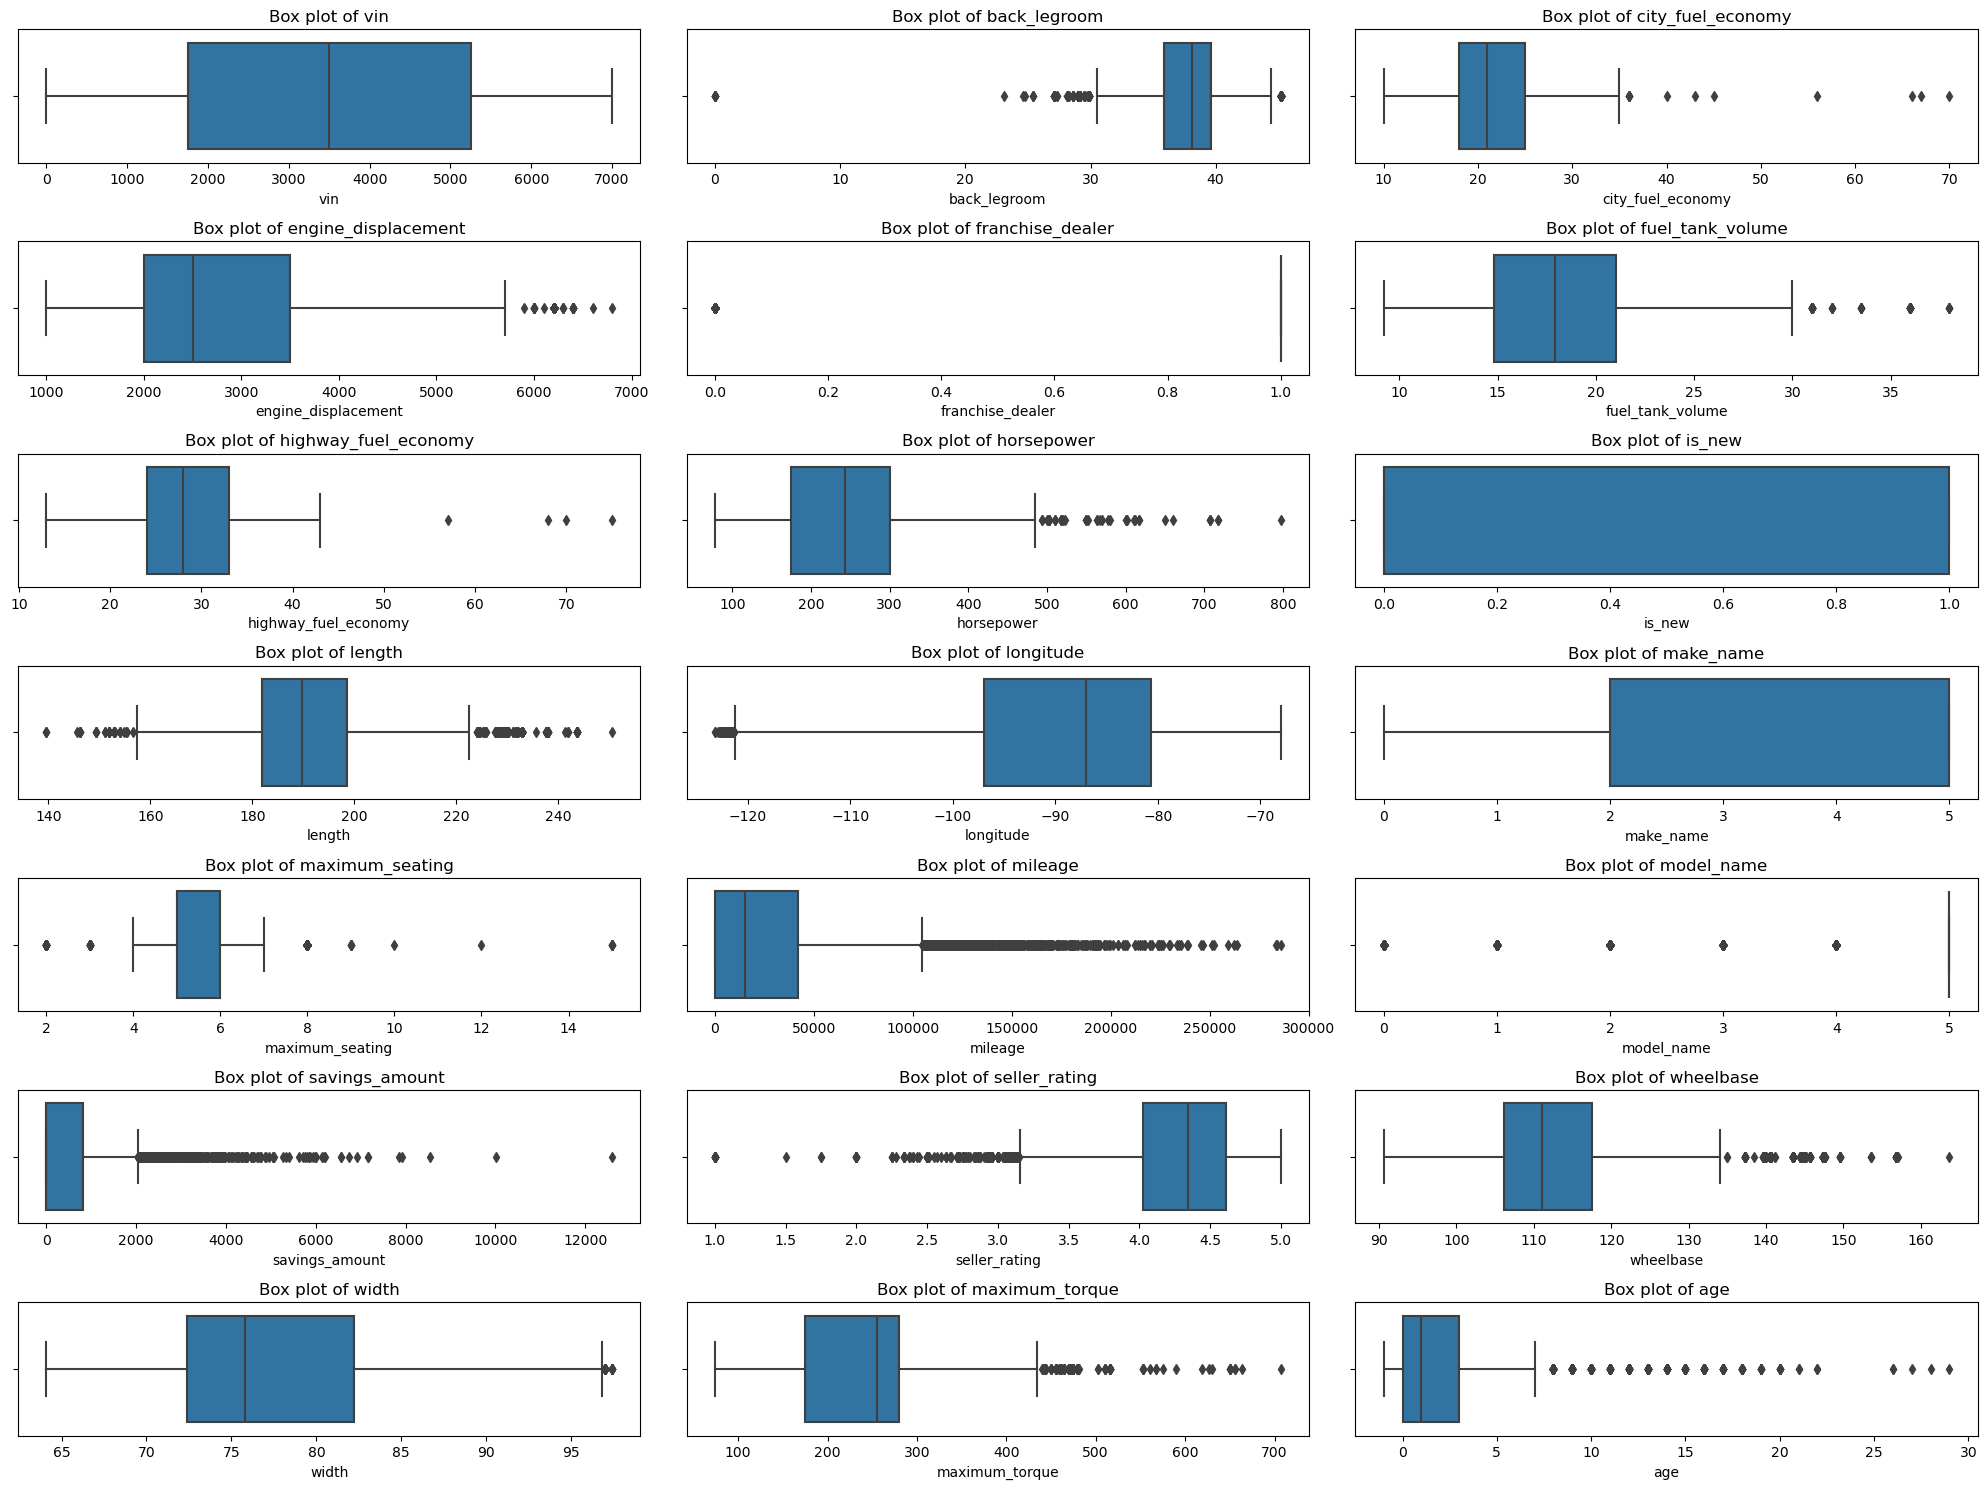

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers with box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(significant_featureslist, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=dftrain_encoded[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

Box plots were used to detect outliers in the continuous variables. Outliers might lead to poor model performance as they introduce misleading patterns for the model to learn. Models which are trained on data with outliers might capture these spurious patterns that do not generalize well to unseen data. Hence, there is a need to remove them to improve generalisation.

#### Treatment of Outliers

In [42]:
def percentile_capping(df, features, lower_percentile=0.01, upper_percentile=0.99):
    for feature in features:
        lower_bound = df[feature].quantile(lower_percentile)
        upper_bound = df[feature].quantile(upper_percentile)
        df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

dftrain_clean = percentile_capping(dftrain_encoded, significant_featureslist)

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

Make sure you **clearly explain each step** you do both in Markdown and on the recoded video.   
*In this task you must not create any additional features and should only relly on the datasets constructed in Task 2.*

1. Build and explain at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (3 marks)    
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly (3 marks)   
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page. Make sure you explain all the steps that led you to chose this algorithm both in the video presentation and in your written answer. (4 marks)   
4. Provide Kaggle ranking and score (screenshot your final submission) and comment (e.g. how could you improve your ranking?) (2 mark)   

- Hints:
    - To perform well you will need to iterate Tasks 2 and Task 3
    - Make sure your Python code works, so that a marker that can replicate your Kaggle submission and score.
    - You will receive the mark of zero if your code does not produce the forecasts uploaded to Kaggle 

**Total Marks: 12**

Student in charge of this task: `Alphonsus Chua Zhi Wei`

In [43]:
# Importing libraries
import xgboost as xgb
import warnings
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

#### Feature Selection and Tuning

Features with high correlations should be removed as they introduce multicollinearity into the model, makes it hard to identify which features are truly important for predicting the target variables. Models trained on data with multicollinearity may not generalize well to new, unseen data. The presence of multicollinearity means that the model's performance heavily relies on the specific relationships present in the training data, making it less robust to variations in the data. After removing those features, we have the final set of features as below.

In [44]:
features = ['back_legroom', 'engine_displacement', 'franchise_dealer',
            'fuel_tank_volume', 'highway_fuel_economy', 'horsepower', 'is_new', 'longitude',
            'make_name', 'maximum_seating', 'mileage', 'savings_amount', 'seller_rating',
            'width', 'maximum_torque', 'age']

#### Train Test Split and Assignment

In [45]:
X_train = dftrain_clean[features]
y_train = dftrain_clean['price']
X_test = dftest_encoded[features]

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

The train test split was removed as it's been found that performance was dropping after including a validation test set. 
One potential reason is that the models did not have sufficient data points to effectively generalise the patterns for effective prediction.

#### Feature Importance using Random Forest Regression

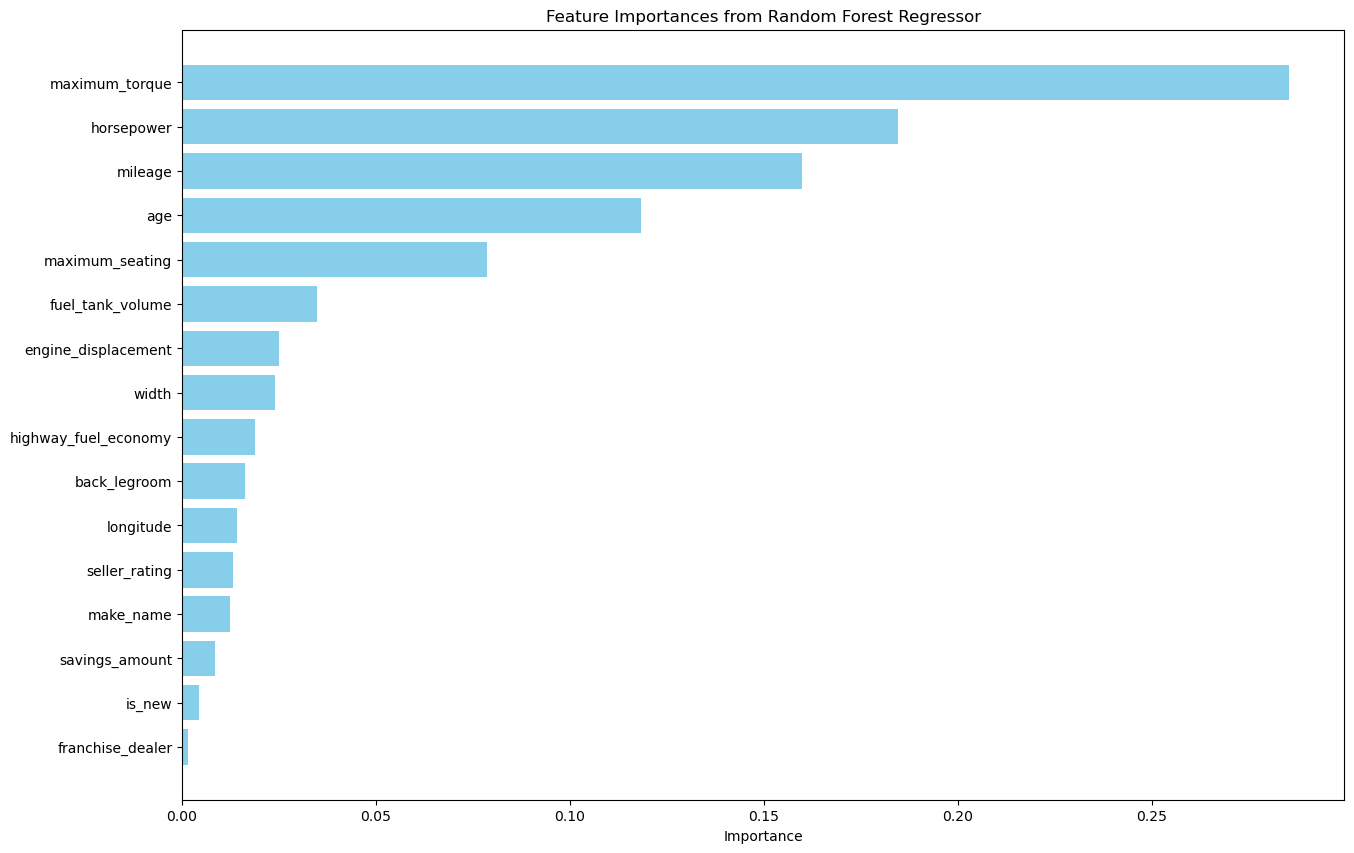

In [46]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

A random forest regressor model was created with 200 decision trees then it will be used to retrieve feature importances. This method contributes to identifying the most important features in predicting the target variables so we can focus on those features to optimize model performance. Selecting important features can also enhance the interpretability of the model, provides meaningful insights about how our model makes its prediction.

Even though 'horsepower' and 'maximum_torque' are highly correlated, they both contribute good explanatory power to the model hence we keep them.

#### Random Forest Regression Model

We decided to use Random Forest Regression Model as it can handle large datasets and is relatively robust to outliers and noise. By having multiple decision trees in a random forest, we can reduce overfitting and variance by averaging their predictions.
Decided to use RandomizedSearchCV instead of GridSearchCV to improve processing times and efficiency. GridSearchCV took too much time to optimise hyperparameters under our time constraint.

In [81]:
# Performing hyperparameter tuning for Random Forest Regressor and then makes predictions 
# on a test set using the best model found during hyperparameter tuning

# Initialize the Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42) 

# Define the parameter grid for hyperparameter tuning
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 7, 10, 12, 15, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_distributions, 
                                      n_iter=100, cv=5, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_  # This score will be negative because of 'neg_mean_squared_error'
best_model_rf = random_search_rf.best_estimator_

print("Best Parameters:", best_params_rf)

'''
y_val_pred = rf_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of RF Regression: {rmse}")
print(f"R-Squared of RF Regression: {r2}")
'''

rf_y_pred = best_model_rf.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}


In [43]:
# Run the best model found in parameter tuning
rf_model = RandomForestRegressor(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=400,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

'''
y_val_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of RF Regression: {rmse}")
print(f"R-Squared of RF Regression: {r2}")
'''

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

In [44]:
answer = pd.read_csv("data/sample_submission.csv")
answer['price'] = rf_y_pred
answer.to_csv('Random Forest Regression.csv', index=False)

#### XGB Regression Model

The regularisation capabilities for XGBoost can help generalisation on unseen data, which is important as we don't have access to the price for the test set. As it is a gradient boosting model, we can use it to create strong learners from multiple weak learners that we have seen in the feature importance from the above Random Forest Regressor.

In [ ]:
xgb_reg = xgb.XGBRegressor(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [400, 500, 600, 700, 800, 1000],
    'max_depth': [1, 3, 5, 7, 9, 11, 13],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 2],
    'reg_lambda': [0, 0.01, 0.05, 0.1, 0.5, 1, 2]
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the data
random_search_xgb.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_
best_model_xgb = random_search_xgb.best_estimator_

'''
y_val_pred = best_model_xgb.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of XGB Regression: {rmse}")
print(f"R-Squared of XGB Regression: {r2}")
'''
print("Best Parameters:", best_params_xgb)
#Predict price on test set
xgb_y_pred = best_model_xgb.predict(X_test)

In [41]:
xgb_model = xgb.XGBRegressor(random_state=42, subsample= 1.0, 
                           reg_lambda= 1, reg_alpha= 0.01, n_estimators= 800, 
                           min_child_weight= 1, max_depth= 5, learning_rate= 0.05, 
                           gamma= 0.5, colsample_bytree= 0.6)

xgb_model.fit(X_train, y_train)
'''
y_val_pred = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of XGB Regression: {rmse}")
print(f"R-Squared of XGB Regression: {r2}")
'''

# Predict on the test set
xgb_y_pred = xgb_model.predict(X_test)

In [42]:
answer = pd.read_csv("data/sample_submission.csv")
answer['price'] = xgb_y_pred
answer.to_csv('XGBoost.csv', index=False)

#### Elastic Net Model

Elastic Net was a good compromise between Lasso and Ridge as it combines L1 and L2 penalties for regularisation as there were multiple features with high correlation. 

PCA was fitted into independent variables to reduce dimensionality of the data before fitting the elastic net regression. However, it seems like the model performance has not improved significantly.

In [62]:
#PCA for Elastic Net
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit PCA to Training and Test Data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

elasticnet = ElasticNet()

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 ratio (0 for L2 regularization, 1 for L1 regularization)
    'max_iter': [1000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criteria
    'selection': ['random']  # Method used to select features
}

grid_search_en = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring = 'neg_mean_squared_error',
                 n_jobs=1, refit=True,cv=5)
grid_search_en.fit(X_train_pca, y_train)

best_params_en = grid_search_en.best_params_
best_model_en = grid_search_en.best_estimator_
'''
y_val_pred = best_model_en.predict(X_val_pca)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)


print(f"Root Mean Squared Error (RMSE) of EN Regression: {rmse}")
print(f"R-Squared of EN Regression: {r2}")
'''
print("Best Parameters:", best_params_en)

en_y_pred = best_model_en.predict(X_test_pca)

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}


In [97]:
answer = pd.read_csv("data/sample_submission.csv")
answer['price'] = en_y_pred
answer.to_csv('ElasticNet.csv', index=False)

#### Stacking

The best model performance was derived from Stacking Regressor. It is an ensemble model of XGBoost, Random Forest and LightGBM. 
We used these models as they have different strengths in dealing with weak learners. Random Forest helps to reduce variance and overfitting and the Boosting models can create strong learners from weak ones. By combining them in a stacking model with a linear regression meta model, we can achieve better generalisation and error reduction on the prediction.

In [49]:
# Define parameter grids
xgboost_param_grid = {
    'n_estimators': [400, 500, 600, 700, 800, 1000],
    'max_depth': [1, 3, 5, 7, 9, 11, 13],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 2],
    'reg_lambda': [0, 0.01, 0.05, 0.1, 0.5, 1, 2]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 7, 10, 12, 15, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

lgb_param_grid = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
}

# Initialize models
xgboost = XGBRegressor(objective='reg:squarederror', tree_method='auto')
randomforest = RandomForestRegressor(random_state=42)
lightgbm = LGBMRegressor()

# Randomized search for XGBoost
xgboost_random_search = RandomizedSearchCV(estimator=xgboost, param_distributions=xgboost_param_grid, 
                                           n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                           n_jobs=-1, verbose=3, random_state=42)
xgboost_random_search.fit(X_train, y_train)
best_xgboost = xgboost_random_search.best_estimator_

# Randomized search for RandomForest
rf_random_search = RandomizedSearchCV(estimator=randomforest, param_distributions=rf_param_grid, 
                                      n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, verbose=3, random_state=42)
rf_random_search.fit(X_train, y_train)
best_randomforest = rf_random_search.best_estimator_

# Randomized search for LightGBM
lgb_random_search = RandomizedSearchCV(estimator=lightgbm, param_distributions=lgb_param_grid,
                                       n_iter=100, cv=5, scoring='neg_mean_squared_error',
                                       n_jobs=-1, verbose=3, random_state=42)
lgb_random_search.fit(X_train, y_train)
best_lightgbm = lgb_random_search.best_estimator_


# Define the base models
base_models = [
    ('xgboost', best_xgboost),
    ('randomforest', best_randomforest),
    ('lightgbm', best_lightgbm),
    ]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

'''
y_val_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of RF Regression: {rmse}")
print(f"R-Squared of RF Regression: {r2}")
'''

# Predict with the stacking regressor
stack_y_pred = stacking_regressor.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 7000, number of negative: 0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [50]:
answer = pd.read_csv("data/sample_submission.csv")
answer['price'] = stack_y_pred
answer.to_csv('Stacking2.csv', index=False)

#### Pickling Best Models

In [63]:
import pickle
#Pickle Tuned Hyperparameter Random Forest Regressor Model
pickle.dump(rf_model, open("best_random_forest_regressor.pkl", "wb"))
print("Best Random Forest Regressor model has been saved to 'best_random_forest_regressor.pkl'")

#Pickle Tuned Hyperparameter XGBoost Regressor Model
pickle.dump(xgb_model, open("best_xgb_regressor.pkl", "wb"))
print("Best XGB Regressor model has been saved to 'best_xgb_regressor.pkl'")

#Pickle Tuned Hyperparameter Stacking Regressor Model
pickle.dump(stacking_regressor, open("stacking_regressor.pkl", "wb"))
print("Stacking regressor model has been saved to 'stacking_regressor.pkl'")

Best Random Forest Regressor model has been saved to 'best_random_forest_regressor.pkl'
Best XGB Regressor model has been saved to 'best_xgb_regressor.pkl'
Stacking regressor model has been saved to 'stacking_regressor.pkl'


#### Final Score and Reflection

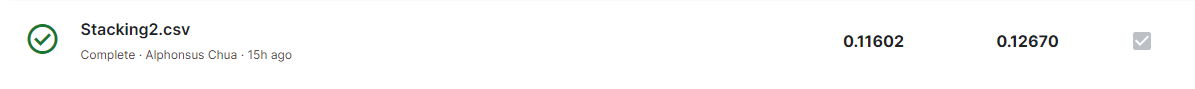

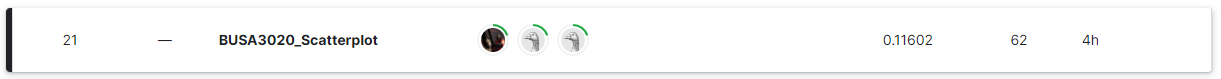

The score of 0.12662 can be further improved by cleaning the model more thoroughly and finding a better way to treat genuine outliers. We can also create a new feature called state by using Geopy to reverse geocode based on the city, latitude and longitude, but this was limited as the API only allowed for 500 queries per day. Better feature engineering like log transformation or creating interaction features between two existing features could have helped performance.

We could have also used Recursive Feature Elimination (RFE) to remove insignificant features instead of OLS and Random Forest.

There was an improvement from 0.12670 to 0.11602, this can mean that the model was not overfitted and generalised well.

An alternative way of dealing with non-linear data was to fit polynomial regression models to the model in a stacking/voting ensemble model.
Using a dedicated code sharing space like GitHub could also help in improving efficiency as it denotes changes made in each version.

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 12 marks
- Data Cleaning: 12 marks
- Building Forecasting models: 12 marks
- Competition Points: 4 marks
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- Video presentations are limited to 15 minutes in duration
- Each team member delivers a 5-minute presentation on their assigned task
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---